# Gerardo de Miguel González

**::GMG::** The aim of this notebook is to find a basic workflow for doing machine learning classification of an imbalanced dataset using best practices taken from other people's examples.

# Binary Classification Proof of Concept

## Libraries

In [1]:
#::GMG::Which libraries are there?
list.files(R.home('library'))

[1] "base"         "boot"         "class"        "cluster"      "codetools"   
 [6] "compiler"     "datasets"     "foreign"      "graphics"     "grDevices"   
[11] "grid"         "KernSmooth"   "lattice"      "MASS"         "Matrix"      
[16] "methods"      "mgcv"         "nlme"         "nnet"         "parallel"    
[21] "rpart"        "spatial"      "splines"      "stats"        "stats4"      
[26] "survival"     "tcltk"        "tools"        "translations" "utils"

**::GMG::** Original `stdout`:

```shell
     'base' 'boot' 'class' 'cluster' 'codetools' 'compiler' 'datasets' 'foreign' 'graphics' 'grDevices' 'grid' 'KernSmooth' 'lattice' 'MASS' 'Matrix' 'methods' 'mgcv' 'nlme' 'nnet' 'parallel' 'rpart' 'spatial' 'splines' 'stats' 'stats4' 'survival' 'tcltk' 'tools' 'translations' 'utils' 
```

In [2]:
#::GMG::Helper function to install missing libraries before loading them
# https://stackoverflow.com/questions/4090169/elegant-way-to-check-for-missing-packages-and-install-them
using<-function(...) {
    libs<-unlist(list(...))
    req<-unlist(lapply(libs,require,character.only=TRUE))
    need<-libs[req==FALSE]
    if(length(need)>0){ 
        install.packages(need)
        lapply(need,require,character.only=TRUE)
    }
}

In [3]:
#::GMG::I'm going to use ... 
# ... mlbench for getting pima indians dataset ...
# https://cran.r-project.org/web/packages/mlbench/index.html
# https://cran.r-project.org/web/packages/mlbench/mlbench.pdf
# ... caTools for train/test splitting datasets ...
# https://cran.r-project.org/web/packages/caTools/index.html
# https://cran.r-project.org/web/packages/caTools/caTools.pdf
# ... correlation plot (corrplot) for EDA visualization ...
# http://www.sthda.com/english/wiki/visualize-correlation-matrix-using-correlogram
# https://cran.r-project.org/web/packages/corrplot/index.html
# ... PRROC: Precision-Recall and ROC Curves for Weighted and Unweighted Data ...
# https://cran.r-project.org/web/packages/PRROC/index.html
# ... ROCR: Visualizing the Performance of Scoring Classifiers ...
# https://cran.r-project.org/web/packages/ROCR/index.html
# ... pROC: Display and Analyze ROC Curves ...
# https://cran.r-project.org/web/packages/pROC/pROC.pdf
# ... boot: Bootstrap Functions (Originally by Angelo Canty for S) for cv.glm() ...
# https://cran.r-project.org/web/packages/boot/index.html
# https://cran.r-project.org/web/packages/boot/boot.pdf pp. 41
using('repr', 'mlbench', 'caTools', 'corrplot', 'PRROC', 'ROCR', 'pROC', 'boot')

Loading required package: repr
Loading required package: mlbench
Loading required package: caTools
Loading required package: corrplot
corrplot 0.84 loaded
Loading required package: PRROC
Loading required package: ROCR
Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess

Loading required package: pROC
Type 'citation("pROC")' for a citation.

Attaching package: ‘pROC’

The following objects are masked from ‘package:stats’:

    cov, smooth, var

Loading required package: boot


**::GMG::** `ROCR` first time run (instalation) 

```R
Loading required package: PRROC

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :

“there is no package called ‘PRROC’”Installing package into ‘/home/jovyan/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

Loading required package: PRROC

    TRUE
```

## Dataset

### kaggle (downloaded)

In [4]:
#::GMG::Where am I?
# http://rfunction.com/archives/1042
getwd()

[1] "/home/jovyan/work/tfm/pub"

In [5]:
#::GMG::What's it there?
list.files()

[1] "data"                                              
 [2] "LICENSE"                                           
 [3] "model"                                             
 [4] "poc_colab_r_feature_selection.ipynb"               
 [5] "poc-py-class-pima-indians-diabetes.ipynb"          
 [6] "poc-py-fs-embed-pima-indians-diabetes.ipynb"       
 [7] "poc-py-fs-filter-pima-indians-diabetes.ipynb"      
 [8] "poc-py-fs-wrapper-pima-indians-diabetes.ipynb"     
 [9] "poc-py-model-selection-pima-indians-diabetes.ipynb"
[10] "poc-py-model-tuning-pima-indians-diabetes.ipynb"   
[11] "poc-py-pipeline-pima-indians-diabetes.ipynb"       
[12] "poc-py-playground.ipynb"                           
[13] "poc-r-bloggers-caret-class-imbalance.ipynb"        
[14] "poc-r-class-pima-indians-diabetes.ipynb"           
[15] "poc-r-fs-caret-pima-indians-diabetes.ipynb"        
[16] "poc-r-fs-wrapper-vidhya.ipynb"                     
[17] "poc-r-lasso-pima-indians-diabetes.ipynb"           
[18] "poc-r-pca-statquest.ipynb"                         
[19] "poc-r-randomforest-statquest.ipynb"                
[20] "README.md"

In [6]:
#::GMG::I've already downloaded from kaggle using my account the csv dataset
#       that is located in the data folder
# https://stat.ethz.ch/R-manual/R-devel/library/base/html/list.files.html
dir("data", pattern = "*.csv", full.names = TRUE, ignore.case = TRUE)

[1] "data/Mutation_calling_variables.csv" "data/pima-indians-diabetes.csv"

In [7]:
#::GMG::Load the data into a data frame
pima <- read.csv('data/pima-indians-diabetes.csv')

In [8]:
head(pima)

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0


In [9]:
#::GMG::I try to get to know the R object
# https://swcarpentry.github.io/r-novice-inflammation/13-supp-data-structures/
#    class() - what kind of object is it (high-level)?
#    typeof() - what is the object’s data type (low-level)?
#    length() - how long is it? What about two dimensional objects?
#    attributes() - does it have any metadata?
# http://www.studytrails.com/r/core/r_print_format/
# http://www.studytrails.com/r/core/r_console_printing/
# https://www.rdocumentation.org/packages/R.utils/versions/2.8.0/topics/printf
# 
cat('pima class and type: ', class(pima), typeof(pima))

pima class and type:  data.frame list

**::NOTE::** Attributes:

```R
attributes(pima)

$names
   'Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI' 'DiabetesPedigreeFunction' 'Age' 'Outcome' 

$class
   'data.frame'

$row.names
   1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41  ... 765 766 767 768
```

In [10]:
cat('pima shape (rows, cols): ', nrow(pima), ncol(pima))

pima shape (rows, cols):  768 9

In [11]:
cat('pima features: \n', 
    format(attributes(pima)$names, justify = "none"), 
    fill = 10
   )

pima features: 
 
Pregnancies 
Glucose 
BloodPressure 
SkinThickness 
Insulin 
BMI 
DiabetesPedigreeFunction 
Age 
Outcome


### mlbench (attached)

In [12]:
#::GMG::With mlbench there's an aalternative to get the pima indians diabetes dataset
# https://cran.r-project.org/web/packages/mlbench/mlbench.pdf
data(PimaIndiansDiabetes)

In [13]:
head(PimaIndiansDiabetes)

pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
6,148,72,35,0,33.6,0.627,50,pos
1,85,66,29,0,26.6,0.351,31,neg
8,183,64,0,0,23.3,0.672,32,pos
1,89,66,23,94,28.1,0.167,21,neg
0,137,40,35,168,43.1,2.288,33,pos
5,116,74,0,0,25.6,0.201,30,neg


In [14]:
#::GMG::There are two versions in mlbench (!)
#::NOTE::What is the difference?
data(PimaIndiansDiabetes2)

In [15]:
head(PimaIndiansDiabetes2)

pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
6,148,72,35,NA,33.6,0.627,50,pos
1,85,66,29,NA,26.6,0.351,31,neg
8,183,64,NA,NA,23.3,0.672,32,pos
1,89,66,23,94,28.1,0.167,21,neg
0,137,40,35,168,43.1,2.288,33,pos
5,116,74,NA,NA,25.6,0.201,30,neg


## Exploratory Data Analysis

**::GMG::** The goal of this stage of our study is to get to know the data, their flaws and perhaps some clues to improve them.

### stats

In [16]:
#::GMG::Here I can see the variables (datasets and functions in memory)
ls()

[1] "pima"                 "PimaIndiansDiabetes"  "PimaIndiansDiabetes2"
[4] "using"

**::GMG::** This dataset consists of 768 observations of 9 variables: 8 variables which will be used as model predictors (number of times pregnant, plasma glucose concentration, diastolic blood pressure (mm Hg), triceps skin fold thickness (in mm), 2-hr serum insulin measure, body mass index, a diabetes pedigree function, and age) and 1 outcome variable (whether or not the patient has diabetes)

In [17]:
#::GMG::There are subtle differences between the kaggle and mlbench datasets
#       i.e. PimaIndiansDiabetes (say, v1) has the class as a factor (R compliant)
str(PimaIndiansDiabetes)

'data.frame':	768 obs. of  9 variables:
 $ pregnant: num  6 1 8 1 0 5 3 10 2 8 ...
 $ glucose : num  148 85 183 89 137 116 78 115 197 125 ...
 $ pressure: num  72 66 64 66 40 74 50 0 70 96 ...
 $ triceps : num  35 29 0 23 35 0 32 0 45 0 ...
 $ insulin : num  0 0 0 94 168 0 88 0 543 0 ...
 $ mass    : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ pedigree: num  0.627 0.351 0.672 0.167 2.288 ...
 $ age     : num  50 31 32 21 33 30 26 29 53 54 ...
 $ diabetes: Factor w/ 2 levels "neg","pos": 2 1 2 1 2 1 2 1 2 2 ...


In [18]:
summary(PimaIndiansDiabetes)

    pregnant         glucose         pressure         triceps     
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    insulin           mass          pedigree           age        diabetes 
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780   Min.   :21.00   neg:500  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437   1st Qu.:24.00   pos:268  
 Median : 30.5   Median :32.00   Median :0.3725   Median :29.00            
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719   Mean   :33.24            
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262   3rd Qu.:41.00            
 Max.   :846.0   Max.   :67.10   Max.   :2.4200   Max.   :81.00            

**::GMG::** It's explained in the [mlbench documentation](https://cran.r-project.org/web/packages/mlbench/mlbench.pdf) (pp. 29):

> The data set `PimaIndiansDiabetes2` contains a corrected version of the original data set.  While the UCI repository index claims that there are no missing values, closer inspection of the data shows **several physical impossibilities**, e.g., blood pressure or body mass index of 0. In `PimaIndiansDiabetes2`, all *zero values* of glucose, pressure, triceps, insulin and mass have been **set to NA**.

In [19]:
#::GMG::PimaIndiansDiabetes2 (say, v2) has the outliers from 
#       glucose, pressure, triceps, insulin and mass as NAs
str(PimaIndiansDiabetes2)

'data.frame':	768 obs. of  9 variables:
 $ pregnant: num  6 1 8 1 0 5 3 10 2 8 ...
 $ glucose : num  148 85 183 89 137 116 78 115 197 125 ...
 $ pressure: num  72 66 64 66 40 74 50 NA 70 96 ...
 $ triceps : num  35 29 NA 23 35 NA 32 NA 45 NA ...
 $ insulin : num  NA NA NA 94 168 NA 88 NA 543 NA ...
 $ mass    : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 NA ...
 $ pedigree: num  0.627 0.351 0.672 0.167 2.288 ...
 $ age     : num  50 31 32 21 33 30 26 29 53 54 ...
 $ diabetes: Factor w/ 2 levels "neg","pos": 2 1 2 1 2 1 2 1 2 2 ...


In [20]:
#::GMG::NA counts yield the outliers (!)
summary(PimaIndiansDiabetes2)

    pregnant         glucose         pressure         triceps     
 Min.   : 0.000   Min.   : 44.0   Min.   : 24.00   Min.   : 7.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 64.00   1st Qu.:22.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :29.00  
 Mean   : 3.845   Mean   :121.7   Mean   : 72.41   Mean   :29.15  
 3rd Qu.: 6.000   3rd Qu.:141.0   3rd Qu.: 80.00   3rd Qu.:36.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
                  NA's   :5       NA's   :35       NA's   :227    
    insulin            mass          pedigree           age        diabetes 
 Min.   : 14.00   Min.   :18.20   Min.   :0.0780   Min.   :21.00   neg:500  
 1st Qu.: 76.25   1st Qu.:27.50   1st Qu.:0.2437   1st Qu.:24.00   pos:268  
 Median :125.00   Median :32.30   Median :0.3725   Median :29.00            
 Mean   :155.55   Mean   :32.46   Mean   :0.4719   Mean   :33.24            
 3rd Qu.:190.00   3rd Qu.:36.60   3rd Qu.:0.6262   3rd Qu.:41.00            
 M

In [21]:
#::GMG::The kaggle version has different names for the features and class
#       Outcome is not a factor but a 'binary' integer type
#       Outliers (zeros in Glucose, BloodPressure, SkinThickness, Insulin and BMI) are kept
#       but not marked as NA
#       Some features are integers (int) and two of them ar double (numeric or num)
str(pima)

'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : int  1 0 1 0 1 0 1 0 1 1 ...


In [22]:
summary(pima)

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

**::GMG::** Here I *notice* that the features are not commensurate with each other. That means some features may need (or may not) some sort of scaling or normalization depending on the [assumptions of the classificatiom method](https://www.statisticssolutions.com/assumptions-of-logistic-regression/) to be used. 

**::NOTE::** It would be useful to take a look at the wisdom of *stackexchange crossvalidated* about this: [Is standardization needed before fitting logistic regression?](https://stats.stackexchange.com/questions/48360/is-standardization-needed-before-fitting-logistic-regression)

**::GMG::** I *also notice* there are zeros in features that *don't allow such a value*, for example `BlodPressure`, `BMI` or `SkinThickness`. These are flaws or *ouliers* and should be fixed. This is not always easy or strightforward and may require deep domain knowledge.

### missing values/outliers

**::GMG::** The Pima Indians Dataset have missing values (NAs) and/or *outliers* depending on the instance of dataset chosen (`kaggle` or `mlbench`). The outliers are zero values from features that cannot have such a value, i.e. `glucose` (`Glucose`), `pressure` (`BloodPressure`), `triceps` (`SkinThickness`), `insulin` (`Insulin`) and `mass` (`BMI`)  

In [23]:
#::GMG::Check for missing values ... I know they are marked witn 'NA' in mlbench 2nd dataset
sapply(PimaIndiansDiabetes2, function(x) sum(is.na(x)))

pregnant  glucose pressure  triceps  insulin     mass pedigree      age 
       0        5       35      227      374       11        0        0 
diabetes 
       0

In [24]:
#::GMG::Check for missing values
#::NOTE::There's no 'NA' marking in kaggle dataset so I know the result beforehand
#        and the fact that physical impossible values in some features are not taken 
#        into account (!)
sapply(pima, function(x) sum(is.na(x)))

Pregnancies                  Glucose            BloodPressure 
                       0                        0                        0 
           SkinThickness                  Insulin                      BMI 
                       0                        0                        0 
DiabetesPedigreeFunction                      Age                  Outcome 
                       0                        0                        0

In [25]:
#::GMG::Counting 'Outliers' a.k.a "physical impossibilities" (Zeros)
# https://stackoverflow.com/questions/22286957/count-the-number-of-non-zero-elements-of-each-column
apply(X = pima[c("Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI")], 
      MARGIN = 2, 
      FUN = function(c) sum(c == 0))

Glucose BloodPressure SkinThickness       Insulin           BMI 
            5            35           227           374            11

**::GMG::** I'll decide how to deal with the outliers in the pre-processing phase (after the train/test split to avoid *data snooping*)

### visualizations

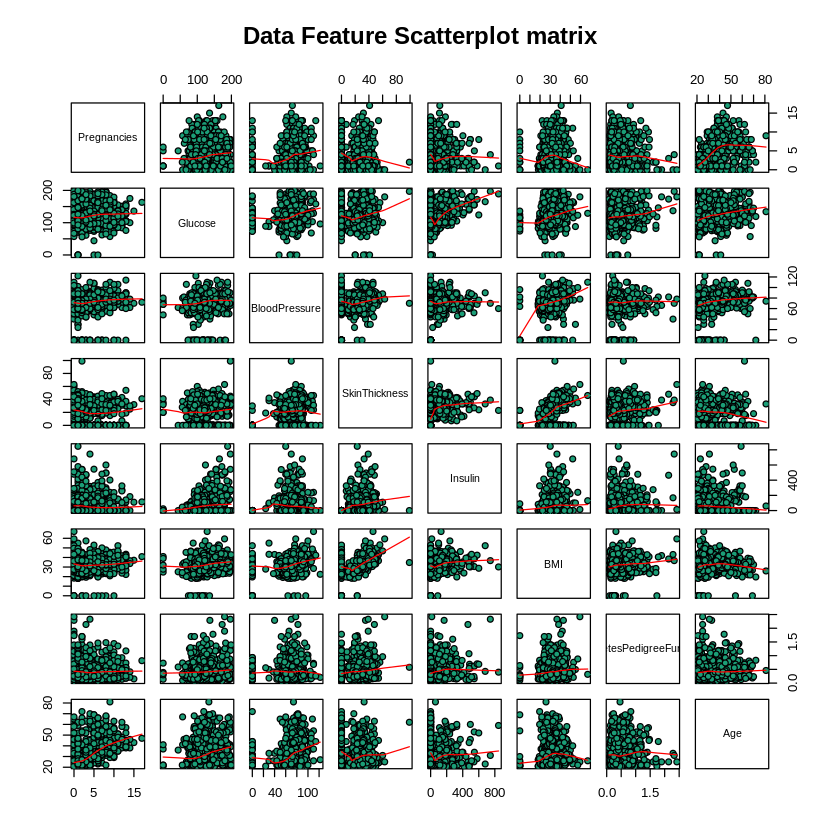

In [26]:
#::GMG::pair plot to see correlations between pairs of features
#::NOTE::See also:
# https://www.statmethods.net/advgraphs/trellis.html
# https://www.statmethods.net/graphs/scatterplot.html
# https://www.statmethods.net/advgraphs/layout.html
# https://www.r-bloggers.com/scatterplot-matrices-pair-plots-with-cdata-and-ggplot2/
#::NOTE::How can I visualize points coloured by Outcome?
pairs(pima[1:8], 
      pch = 21, 
      main = 'Data Feature Scatterplot matrix', 
      panel = panel.smooth, 
      bg = c("#1b9e77", "#d95f02")[unclass(pima$Outcome)]
     )

In [27]:
#::GMG::Another way to see correlations with corrplot
# http://www.sthda.com/english/wiki/visualize-correlation-matrix-using-correlogram
# https://stat.ethz.ch/R-manual/R-devel/library/stats/html/cor.html
# https://www.statmethods.net/stats/correlations.html
#::NOTE::Se also https://www.statmethods.net/advgraphs/correlograms.html
M <- cor(pima)

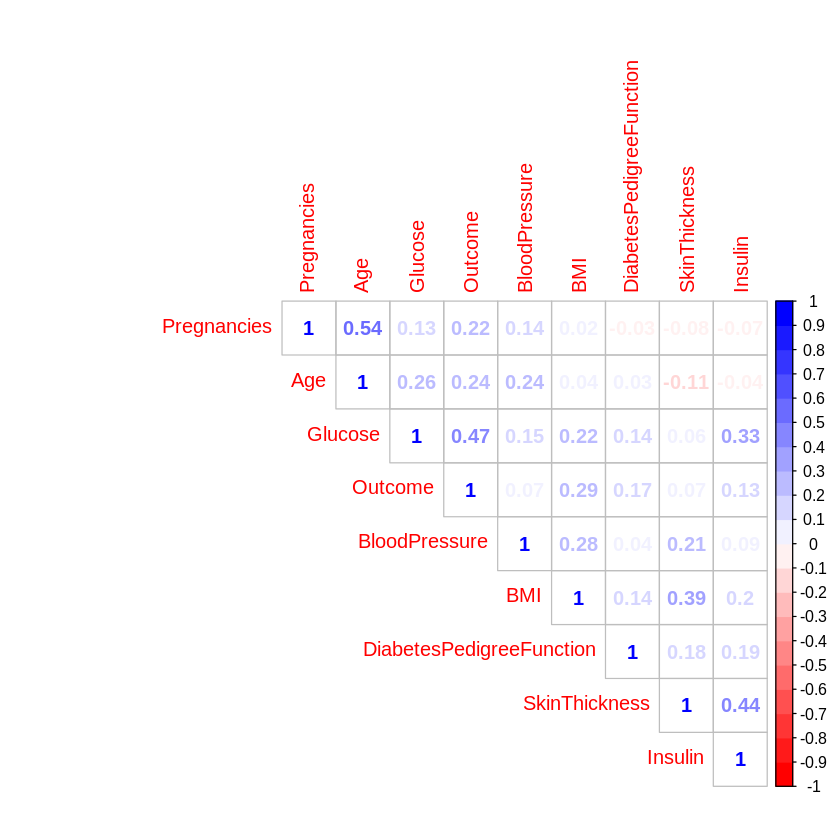

In [28]:
#::GMG::Plot correlation plot
# http://www.sthda.com/english/wiki/visualize-correlation-matrix-using-correlogram
col<- colorRampPalette(c("red", "white", "blue"))(20)
corrplot(M, method="number", type="upper", order="hclust", col = col)

**::GMG::** I could infer some naïve *redudance* and *importance* assessments from the pair correlation values between the features and between each feature and the target (`Outcome`) and take some decisions about dropping or keeping the features downstream in the model.

**NOTE** I think doing this before train/test split would be a major flaw in my dataflow resulting in *data snooping* and invalidating my final algorith metric computations. 

### target to factor

In [29]:
#::GMG::I change the Outcome variable into a 2 factor, The R way ;)
# https://swcarpentry.github.io/r-novice-inflammation/12-supp-factors/
# https://www.stat.berkeley.edu/~s133/factors.html
# https://stackoverflow.com/questions/13613913/how-do-i-convert-certain-columns-of-a-data-frame-to-become-factors
pima$Outcome <- as.factor(x = pima$Outcome)
levels(pima$Outcome) <- c('neg', 'pos')

In [30]:
str(pima)

'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : Factor w/ 2 levels "neg","pos": 2 1 2 1 2 1 2 1 2 2 ...


### imbalance

**::GMG::** Finally I think It's worth noting that there is **imbalance** in the dataset. It's not an extreme imbalance but I'll take it into account in train/test splitting and the choice of metrics for method evaluation.

In [31]:
#::GMG::Now I test the imbalance of the dataset
# http://metadatascience.com/2013/07/03/plotting-the-frequency-distribution-using-r/
table(pima$Outcome)


neg pos 
500 268 

In [32]:
prop.table(table(pima$Outcome))


      neg       pos 
0.6510417 0.3489583 

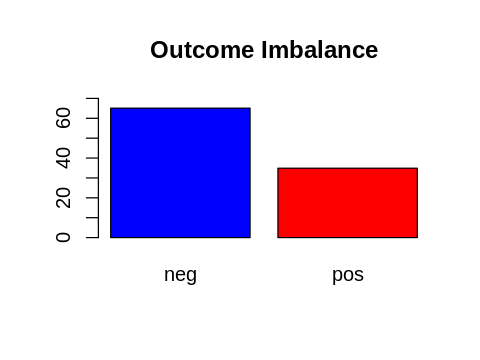

In [33]:
#::GMG::Plot the imbalance
# https://www.statmethods.net/advgraphs/parameters.html
# http://www.programmingr.com/content/positioning-charts-fig-and-fin/
#::NOTE::I don't know how to make the fig smaller and the margins tight (!?)
# https://blog.revolutionanalytics.com/2015/09/resizing-plots-in-the-r-kernel-for-jupyter-notebooks.html
options(repr.plot.width=4, repr.plot.height=3)
barplot(100*prop.table(table(pima$Outcome)), 
        col = c('blue', 'red'),
        ylim = c(0,70),
        main = 'Outcome Imbalance')

## Train/Test Split

**::GMG::** Before pre-processing, I isolate training and testing sets to avoid *Data Snooping*. This important trap is quoted by Justin Le in his [kaggel kernel](https://www.kaggle.com/lejustin/feature-engineering-metric-comparison) *Feature Engineering & Metric Comparison* (Python notebook using data from Pima Indians Diabetes Database) that I mentioned before, who in turn also quotes a famous machine learning master class by **Dr. Yaser Abu-Mostafa**, Caltech:

  - [Lecture 17](http://www.teachingtree.co/watch/data-snooping) - Three Learning Principles  
  
that I vividly recommend watching.

In [34]:
#::GMG::Let's make it reproducible
set.seed(1)

In [35]:
#::GMG::I do the customary train/test split BUT stratifiying (?) because of the imbalance
#       to make sure the percentages of healthy/diabetes hold in the train and test sets
#
#::NOTE::caTools has sample.split( Y, SplitRatio = 2/3, group = NULL )
# https://www.rdocumentation.org/packages/caTools/versions/1.17.1/topics/sample.split
# https://cran.r-project.org/web/packages/caTools/caTools.pdf
#
# Split data from vector Y into two sets in predefined ratio while preserving relative ratios of 
# differentlabels in Y. Used to split the data used during classification into train and 
# test subsets.
#::NOTE::So it seems this does whay I want it to do ...
msk <- caTools::sample.split(Y = pima$Outcome, SplitRatio = 0.7)

In [36]:
pima_train <- pima[msk,]  # use output of sample.split to ...
pima_test  <- pima[!msk,] # create train and test subse

In [37]:
str(pima_train)

'data.frame':	538 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 10 2 4 10 ...
 $ Glucose                 : int  148 85 183 89 137 116 115 197 110 139 ...
 $ BloodPressure           : int  72 66 64 66 40 74 0 70 92 80 ...
 $ SkinThickness           : int  35 29 0 23 35 0 0 45 0 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 0 543 0 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 35.3 30.5 37.6 27.1 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 29 53 30 57 ...
 $ Outcome                 : Factor w/ 2 levels "neg","pos": 2 1 2 1 2 1 1 2 1 1 ...


In [38]:
prop.table(table(pima_train$Outcome))


      neg       pos 
0.6505576 0.3494424 

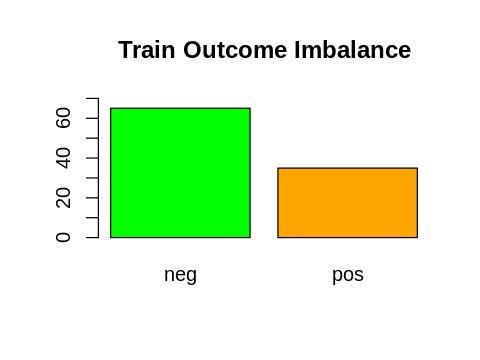

In [39]:
#::GMG::Plot the imbalance, see wether percentage is kept
#::NOTE::I don't know how to make the fig smaller and the margins tight (!?)
barplot(100*prop.table(table(pima_train$Outcome)), 
        col = c('green', 'orange'),
        ylim = c(0,70),
        main = 'Train Outcome Imbalance')

In [40]:
str(pima_test)

'data.frame':	230 obs. of  9 variables:
 $ Pregnancies             : int  3 8 10 9 10 7 5 6 9 2 ...
 $ Glucose                 : int  78 125 168 119 125 147 117 92 102 90 ...
 $ BloodPressure           : int  50 96 74 80 70 76 92 92 76 68 ...
 $ SkinThickness           : int  32 0 0 35 26 0 0 0 37 42 ...
 $ Insulin                 : int  88 0 0 0 115 0 0 0 0 0 ...
 $ BMI                     : num  31 0 38 29 31.1 39.4 34.1 19.9 32.9 38.2 ...
 $ DiabetesPedigreeFunction: num  0.248 0.232 0.537 0.263 0.205 0.257 0.337 0.188 0.665 0.503 ...
 $ Age                     : int  26 54 34 29 41 43 38 28 46 27 ...
 $ Outcome                 : Factor w/ 2 levels "neg","pos": 2 2 2 2 2 2 1 1 2 2 ...


In [41]:
prop.table(table(pima_test$Outcome))


      neg       pos 
0.6521739 0.3478261 

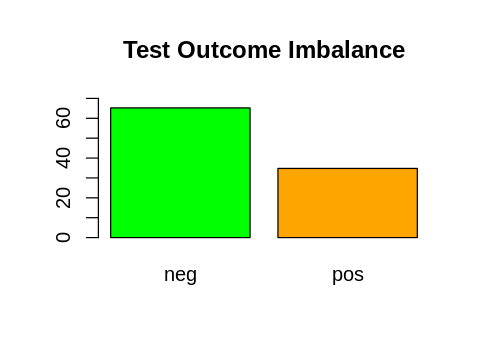

In [42]:
#::GMG::Plot the imbalance, see wether percentage is kept
#::NOTE::I don't know how to make the fig smaller and the margins tight (!?)
barplot(100*prop.table(table(pima_test$Outcome)), 
        col = c('green', 'orange'),
        ylim = c(0,70),
        main = 'Test Outcome Imbalance')

## Pre-Processing (optional)

**::PENDING::** <span style="color:red">Doing Pre-processing here</span>

In [43]:
#::GMG::Variables created so far :)
ls()

[1] "col"                  "M"                    "msk"                 
[4] "pima"                 "pima_test"            "pima_train"          
[7] "PimaIndiansDiabetes"  "PimaIndiansDiabetes2" "using"

**::GMG::** Here I'm going to do [some transformations to the features](https://machinelearningmastery.com/pre-process-your-dataset-in-r/) in order to fix things like outliers and variability. The transformations I'm going to apply are *scaling* and *imputation*. Those transformations may be applied separately or in combination. First I'm going to apply them separately to one model (*Logistic Regression*) and then, when I learn how to do it (pipelines and whatnot), in combination (probably with several models or along with model hyperparameter tuning) with best practice cross validation to avoid *data snooping*. 

### scaling

**::GMG::** I wonder whether the fearures of tha dataset really need scaling. And what's scaling to that. [Scale, Normalize or Standardize](https://stats.stackexchange.com/questions/70553/what-does-normalization-mean-and-how-to-verify-that-a-sample-or-a-distribution/70555#70555)? To understand the need of scaling I've already quoted a reference from *StackExchange Crossvalidated*: [Is standardization needed before fitting logistic regression?](https://stats.stackexchange.com/questions/48360/is-standardization-needed-before-fitting-logistic-regression)
/whats-the-difference-between-normalization-and-standardization/10291#10291)

> Standardization isn't required for logistic regression. The main goal of standardizing features is to help convergence of the technique used for optimization. For example, if you use Newton-Raphson to maximize the likelihood, standardizing the features makes the convergence faster. Otherwise, you can run your logistic regression without any standardization treatment on the features.

I've also read what [Sebastian Raschka](https://sebastianraschka.com/about.html), a machine learning researcher, [has to say](https://sebastianraschka.com/Articles/2014_about_feature_scaling.html#evaluating-the-classification-accuracy-with-and-without-standardization):

> Some examples of algorithms where feature scaling matters are: logistic regression, [...] if you are using gradient descent/ascent-based optimization.
>
> [...]
>
> In addition, we’d also want to think about whether we want to “standardize” or “normalize” (here: scaling to [0, 1] range) our data. Some algorithms assume that our data is centered at 0. For example, if we initialize the weights of a small multi-layer perceptron with tanh activation units to 0 or small random values centered around zero, we want to update the model weights “equally.” As a rule of thumb I’d say: When in doubt, just standardize the data, it shouldn’t hurt.

**::GMG::** The different scaling techniques meanings and usage can be seen in the following reference I've collected:

  - [Medium](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e) Why, How and When to Scale your Features by Sudharsan Asaithambi, Dec 4, 2017
  
> When to Scale
>
>Rule of thumb I follow here is any algorithm that computes distance or assumes normality, scale your features!!!

**::PENDING::** <span style="color:red">Do scaling here</span>

### wrong (imputation)?

**::GMG::** This would lead to *data snooping* because I'm doing it before the split (with whole pima dataset here) if I'm not mislead of the concept of data leaking ...

In [44]:
#::GMG::What do I do with the outliers?
#       Glucose, Insulin, BloodPressure, SkinThickness, and BMI 
#       Options: remove, impute, leave them untouched (lto)
#       Chosen: remove (Glucose, BloodPressure, BMI) + lto (SkinThickness, Insulin)
# https://stackoverflow.com/questions/9977686/how-to-remove-rows-with-a-zero-value-in-r
#::NOTE::I cannot remove the outliers from SkinThickness and Insuline 
#        because they're a big slice of the dataset (!)
row_sub <- apply(
             X = pima[c("Glucose", "BloodPressure", "BMI")], 
             MARGIN = 1, 
             FUN = function(row) all(row != 0)
)

**::NOTE::** I've [searched](https://www.google.com/search?client=firefox-b-d&q=a+person+can+have+zero+insulin%3F) about this *zero insulin issue*. So [it turns out](https://www.yourhormones.info/hormones/insulin/) that:

> People with type 1 diabetes produce very little or no insulin at all. This condition is caused when the beta cells that make insulin have been destroyed by antibodies (these are usually substances released by the body to fight against infections), hence they are unable to produce insulin.

So it remains only the `SkinThickness` zero physical impossibility *unresolved* and left it be.

In [45]:
#::GMG::I remove some of the outliers
pima_mod <- pima[row_sub,]

In [46]:
#::GMG::The somewhat cleaned dataset ...
str(pima_mod)

'data.frame':	724 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 2 4 10 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 197 110 168 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 70 92 74 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 45 0 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 543 0 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 30.5 37.6 38 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 53 30 34 ...
 $ Outcome                 : Factor w/ 2 levels "neg","pos": 2 1 2 1 2 1 2 2 1 2 ...


### imputation

**::PENDING::** <span style="color:red">Imputation here</span>

## Logistic Regression (logit)

### train (model)

In [44]:
#::GMG::Training the Model
# https://www.statmethods.net/advstats/glm.html
# https://www.rdocumentation.org/packages/stats/versions/3.6.1/topics/glm
# https://stat.ethz.ch/R-manual/R-devel/library/stats/html/glm.html
#::NOTE:there's a parameter called weights:
#       an optional vector of ‘prior weights’ to be used in the fitting process. Should be NULL or a numeric vector.
#::NOTE::In the details sections from documentation:
#       Non-NULL weights can be used to indicate that different observations have different dispersions 
#       (with the values in weights being inversely proportional to the dispersions); or equivalently, 
#       when the elements of weights are positive integers w_i, that each response y_i is the mean of w_i 
#       unit-weight observations. For a binomial GLM prior weights are used to give the number of trials 
#       when the response is the proportion of successes: they would rarely be used for a Poisson GLM.
#
#::QUESTION::Is this the same as in scikit learn 'balanced' model parameter?
fit_pima <- stats::glm(Outcome ~., 
                data = pima_train, 
                family = binomial(link = 'logit'))

> A typical predictor has the form response ~ terms where response is the (numeric) response vector and terms is a series of terms which specifies a linear predictor for response. *For binomial and quasibinomial families the response can also be specified as a factor (when the first level denotes failure and all others success)*.

(See [R Documentation](https://www.rdocumentation.org/packages/stats/versions/3.6.1/topics/glm) `glm()` and [a case](https://r.789695.n4.nabble.com/predict-glm-gt-which-class-does-it-predict-td891759.html) *predict.glm -> which class does it predict?* on R Help forum)

**::NOTE::** In my case I have pima `Outcome` as a factor with two levels, i.e `neg`, `pos`, being the goal to detect diabetes, the success is `pos`.

In [45]:
#::GMG::Model results
summary(fit_pima)


Call:
stats::glm(formula = Outcome ~ ., family = binomial(link = "logit"), 
    data = pima_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6692  -0.6989  -0.3957   0.6778   3.1059  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -8.8674112  0.9082424  -9.763  < 2e-16 ***
Pregnancies               0.0998500  0.0389323   2.565  0.01033 *  
Glucose                   0.0370864  0.0044224   8.386  < 2e-16 ***
BloodPressure            -0.0121143  0.0061716  -1.963  0.04966 *  
SkinThickness            -0.0092675  0.0084546  -1.096  0.27301    
Insulin                   0.0004008  0.0011124   0.360  0.71865    
BMI                       0.0976570  0.0186232   5.244 1.57e-07 ***
DiabetesPedigreeFunction  1.1329183  0.3712654   3.052  0.00228 ** 
Age                       0.0114250  0.0115404   0.990  0.32217    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter f

> The summary of our model reveals interesting information. The performance of a logistic regression is evaluated with specific key metrics.
>
>  - *AIC (Akaike Information Criteria)*: This is the equivalent of R2 in logistic regression. It measures the fit when a penalty is applied to the number of parameters. Smaller AIC values indicate the model is closer to the truth.
>  - *Null deviance*: Fits the model only with the intercept. The degree of freedom is n-1. We can interpret it as a Chi-square value (fitted value different from the actual value hypothesis testing).
>  - *Residual Deviance*: Model with all the variables. It is also interpreted as a Chi-square hypothesis testing.
>  - *Number of Fisher Scoring iterations*: Number of iterations before converging.
>  
> The output of the `glm()` function is stored in a list. 

([Guru99](https://www.guru99.com/r-generalized-linear-model.html))

> Get some criteria of model fitting
>
>You can simply extract some criteria of the model fitting, for example, Residual deviance (equivalent to SSE in linear regression model), AIC and BIC.

([Lab Notebook](http://homepages.uc.edu/~lis6/Teaching/DM18Spring/Lab/lab5_logit.html) in [Data Mining I (BANA7046) 2018 Spring](http://homepages.uc.edu/~lis6/DM-18Spring.html) by [Shaobo Li](http://homepages.uc.edu/~lis6/))

In [46]:
cat('Deviance:',fit_pima$deviance, 
    '\nAIC:', stats::AIC(fit_pima), 
    '\nBIC:', stats::BIC(fit_pima)
)

Deviance: 488.4071 
AIC: 506.4071 
BIC: 544.9978

**::GMG::** The result shows that the variables `SkinThickness`, `Insulin` and `Age` are *not statistically significant*. In other words, the *p_values is greather than 0.05*.

In [47]:
#::GMG::So may I just remove (drop) the features shown not significant by the wald test?
#::NOTE::Some examples I've seen do that ...
fit_pima2 <- update(
    fit_pima, ~. - SkinThickness - Insulin  - Age 
)

In [48]:
#::GMG::Let's see what happens ...
summary(fit_pima2)


Call:
stats::glm(formula = Outcome ~ Pregnancies + Glucose + BloodPressure + 
    BMI + DiabetesPedigreeFunction, family = binomial(link = "logit"), 
    data = pima_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5644  -0.7036  -0.3910   0.6664   3.1355  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -8.524517   0.855772  -9.961  < 2e-16 ***
Pregnancies               0.122825   0.033290   3.690 0.000225 ***
Glucose                   0.038319   0.004217   9.088  < 2e-16 ***
BloodPressure            -0.012711   0.005980  -2.126 0.033541 *  
BMI                       0.088796   0.017290   5.136 2.81e-07 ***
DiabetesPedigreeFunction  1.093122   0.365595   2.990 0.002790 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 696.28  on 537  degrees of freedom
Residual deviance: 490.87  on 532  degrees of fr

In [49]:
cat('Deviance:',fit_pima2$deviance, 
    '\nAIC:', stats::AIC(fit_pima2), 
    '\nBIC:', stats::BIC(fit_pima2)
)

Deviance: 490.8701 
AIC: 502.8701 
BIC: 528.5973

**::PENDING::** <span style="color:red">Discussion about dropping some not significant features here.</span>

### in-sample prediction

In [50]:
#::GMG::I get the 'response' of the model to the train dataset
# https://www.rdocumentation.org/packages/stats/versions/3.6.1/topics/predict.glm
pred_pima_train <- predict(object = fit_pima, type = 'response')
str(pred_pima_train)

 Named num [1:538] 0.6426 0.0344 0.7933 0.0367 0.934 ...
 - attr(*, "names")= chr [1:538] "1" "2" "3" "4" ...


In [51]:
#::GMG::I do the same with the simpler model (out of curiosity)
pred_pima_train_2 <- predict(object = fit_pima2, type = 'response')
str(pred_pima_train_2)

 Named num [1:538] 0.6542 0.0378 0.8116 0.041 0.9272 ...
 - attr(*, "names")= chr [1:538] "1" "2" "3" "4" ...


### in-sample ROC curve (and AUC)

In [52]:
#::GMG::Fix figure size
# https://www.rdocumentation.org/packages/base/versions/3.3/topics/options
# https://www.rdocumentation.org/packages/repr/versions/0.10/topics/repr-options
base::options(repr.plot.width = 8, repr.plot.height = 6)

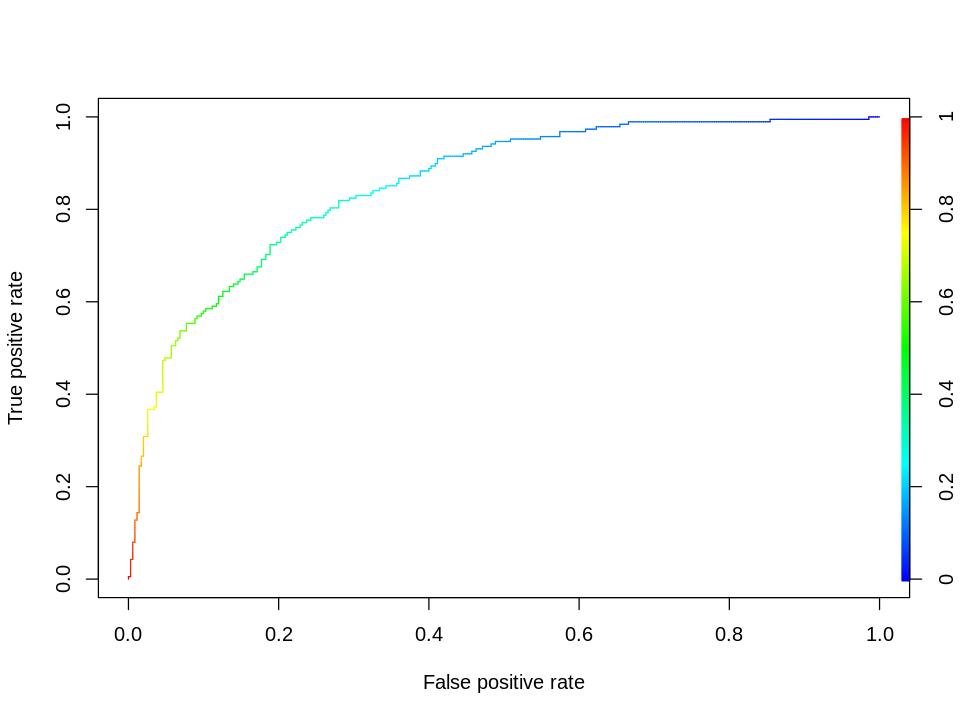

In [53]:
#::GMG::(Sensitivity/1-specificity) ROC Curve and AUC (ROCR)
# https://en.wikipedia.org/wiki/Sensitivity_and_specificity
# http://homepages.uc.edu/~lis6/Teaching/DM18Spring/Lab/lab5_logit.html
# https://cran.r-project.org/web/packages/ROCR/ROCR.pdf
# https://hopstat.wordpress.com/2014/12/19/a-small-introduction-to-the-rocr-package/
#::NOTE::The ROCR::prediction function needs the labels as a 0/1 numeric vector
pred_train <- ROCR::prediction(pred_pima_train, ifelse(pima_train$Outcome == 'pos', 1, 0))
perf_train <- ROCR::performance(pred_train, "tpr", "fpr")
ROCR::plot(perf_train, colorize=TRUE)

In [54]:
#::GMG:: Get the ROC AUC
roc_auc_train <- unlist(slot(ROCR::performance(pred_train, "auc"), "y.values"))
cat('Train ROC AUC:', roc_auc_train)

Train ROC AUC: 0.8528723

> Be careful that the function `prediction()` is different from `predict()`. It is in Package `ROCR`, and is particularly used for preparing for ROC curve. Recall out lecture, this function basically *calculates many confusion matrices with different cut-off probability*. Therefore, it requires two vectors as inputs – **predicted probability** and **observed response (0/1)**. The next line, `performance()` calculates TPR and FPR based all confusion matrices you get from previous step. Then you can simply draw the ROC curve, which is a curve of FPR vs. TPR. 

([Lab Notebook](http://homepages.uc.edu/~lis6/Teaching/DM18Spring/Lab/lab5_logit.html) in [Data Mining I (BANA7046) 2018 Spring](http://homepages.uc.edu/~lis6/DM-18Spring.html) by [Shaobo Li](http://homepages.uc.edu/~lis6/))

In [55]:
#::GMG::The RIC AUC of the simpler model for comparison
pred_train_2 <- ROCR::prediction(pred_pima_train_2, ifelse(pima_train$Outcome == 'pos', 1, 0))
roc_auc_train_2 <- unlist(slot(ROCR::performance(pred_train_2, "auc"), "y.values"))
cat('Train ROC AUC (Simpler Model):', roc_auc_train_2)

Train ROC AUC (Simpler Model): 0.8502128

### in-sample P/R Curve (and P/R AUC)

> Precision and recall curve and its AUC is more appropriate for imbalanced data. We use package PRROC to draw the PR curve. It can also draw the ROC curve. More details of the package can be found [here](https://cran.r-project.org/web/packages/PRROC/vignettes/PRROC.pdf).

([Lab Notebook](http://homepages.uc.edu/~lis6/Teaching/DM18Spring/Lab/lab5_logit.html) in [Data Mining I (BANA7046) 2018 Spring](http://homepages.uc.edu/~lis6/DM-18Spring.html) by [Shaobo Li](http://homepages.uc.edu/~lis6/))

In [56]:
#::GMG::P/R Curve and AUC (PRROC)
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4514923/
# https://academic.oup.com/bioinformatics/article/31/15/2595/187781
# https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0092209
# https://stats.stackexchange.com/questions/10501/calculating-aupr-in-r
# https://cran.r-project.org/web/packages/PRROC/PRROC.pdf pp.7-8
# https://cran.r-project.org/web/packages/PRROC/vignettes/PRROC.pdf 
#::NOTE::Soft-labeled classification problem:
#        Each data point belongs to both of the two classes with a certain probability, where for each data
#        point, these two probabilities add up to 1. In this case, the classification scores for all data points
#        need to be provided only once as scores.class0 and only the positive/foreground weights for each
#        data point need to be provided in weights.class0, while the converse probability for the negative
#        class is automatically set to weights.class1=1.0-weights.class0.
score1_train <- pred_pima_train[pima_train$Outcome == 'pos']
score0_train <- pred_pima_train[pima_train$Outcome == 'neg']
pr_curve_pima_train <- PRROC::pr.curve(
    score1_train, 
    score0_train, 
    min.compute = T, 
    max.compute = T,
    rand.compute = T,
    curve = T
)
print(pr_curve_pima_train)


  Precision-recall curve

    Area under curve (Integral):
     0.7477106 

    Relative area under curve (Integral):
     0.6847932 

    Area under curve (Davis & Goadrich):
     0.7475964 

    Relative area under curves (Davis & Goadrich):
     0.6846507 

    Curve for scores from  0.001214375  to  0.9940185 
    ( can be plotted with plot(x) )



    Maximum AUC:
     1   1 


    Minimum AUC:
     0.199607   0.1996062 


    AUC of a random classifier:
     0.3494424   0.3494424 


> For PR curves, the minimal possible PR curve is not equal to a straight line at precision = 0. For soft-labeled data, neither the PR curve nor the ROC curve typically reach a maximum AUC value of 1 or a minimum AUC value of 0. To allow for a better impression of the (relative) performance of a classifier at hand, the PRROC package can also compute the maximum curve and its AUC value (parameter max.compute = T), the minimum curve and its AUC value (min.compute = T) and the curve and AUC value of a random classifier (rand.compute = T).

[PRROC: computing and visualizing precision-recall and receiver operating characteristic curves in R](https://cran.r-project.org/web/packages/PRROC/vignettes/PRROC.pdf) pp. 8

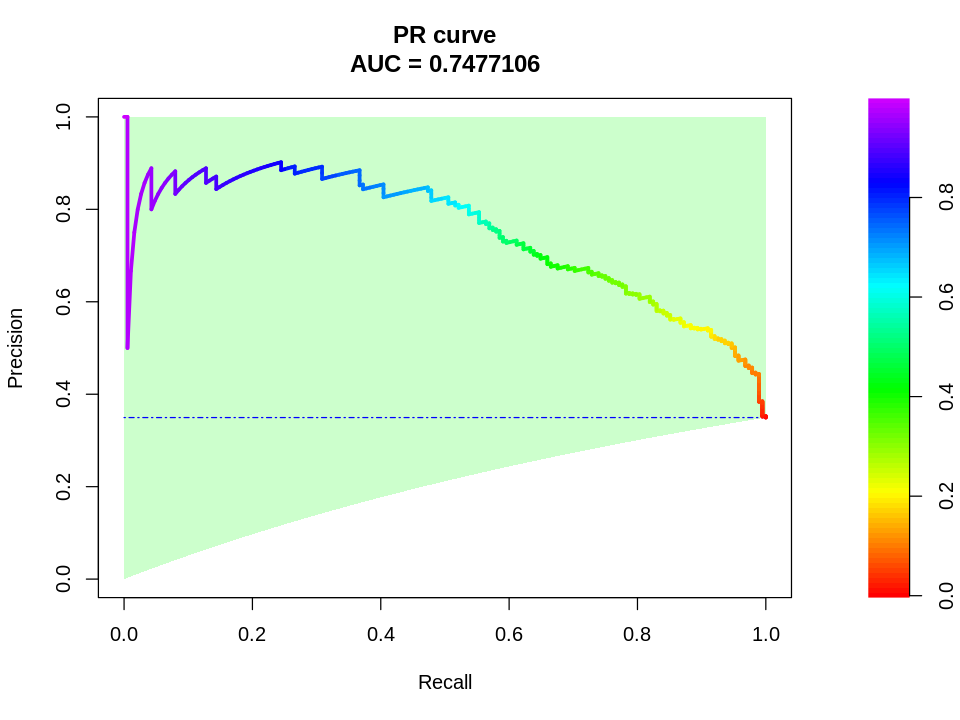

In [57]:
#::GMG::Plot P/R curve with all the trimmings
plot(pr_curve_pima_train, 
     rand.plot = TRUE, 
     fill.area = TRUE, 
     fill.color = rgb(0.8,1,0.8),
     maxminrand.col = "blue" 
)

> If computed, the maximum and minimum curve and the curve of the random classifier may be included into the PR curve (and ROC curve) plots using parameters `max.plot`, `min.plot`, and `rand.plot`, respectively. In addition, the area between maximum and minimum curve may be shaded.

[PRROC: computing and visualizing precision-recall and receiver operating characteristic curves in R](https://cran.r-project.org/web/packages/PRROC/vignettes/PRROC.pdf) pp. 9

> Note that for a random classifier, ROC AUC will be close to 0.5 irrespective of the class imbalance. However, the PR AUC is tricky. (see [What is "baseline" in precision recall curve](https://stats.stackexchange.com/questions/251175/what-is-baseline-in-precision-recall-curve))

[CrossValidated](https://stats.stackexchange.com/questions/10501/calculating-aupr-in-r) Calculating AUPR in R [closed]

In [58]:
pr_auc_train <- pr_curve_pima_train$auc.integral
cat('Train P/R AUC:', pr_auc_train)

Train P/R AUC: 0.7477106

###  out-of-sample prediction

In [59]:
#::GMG::I compute the out-of-sample (test) predicition
#::NOTE::So predict response type returns values that can be interpreted as
#        probabilities of classification of samples into neg and pos classes (binary classification here)
pred_pima_test <- predict(
    object = fit_pima, 
    newdata = pima_test, 
    type="response"
) 
str(pred_pima_test)

 Named num [1:230] 0.0504 0.0238 0.8978 0.1998 0.3686 ...
 - attr(*, "names")= chr [1:230] "7" "10" "12" "24" ...


In [60]:
#::GMG::I also compute the out-of-sample (test) prediction of the simper model (included for completeness)
pred_pima_test_2 <- predict(
    object = fit_pima2, 
    newdata = pima_test, 
    type="response"
) 
str(pred_pima_test_2)

 Named num [1:230] 0.0585 0.0237 0.8968 0.2663 0.3988 ...
 - attr(*, "names")= chr [1:230] "7" "10" "12" "24" ...


### out-of-sample ROC curve (and AUC)

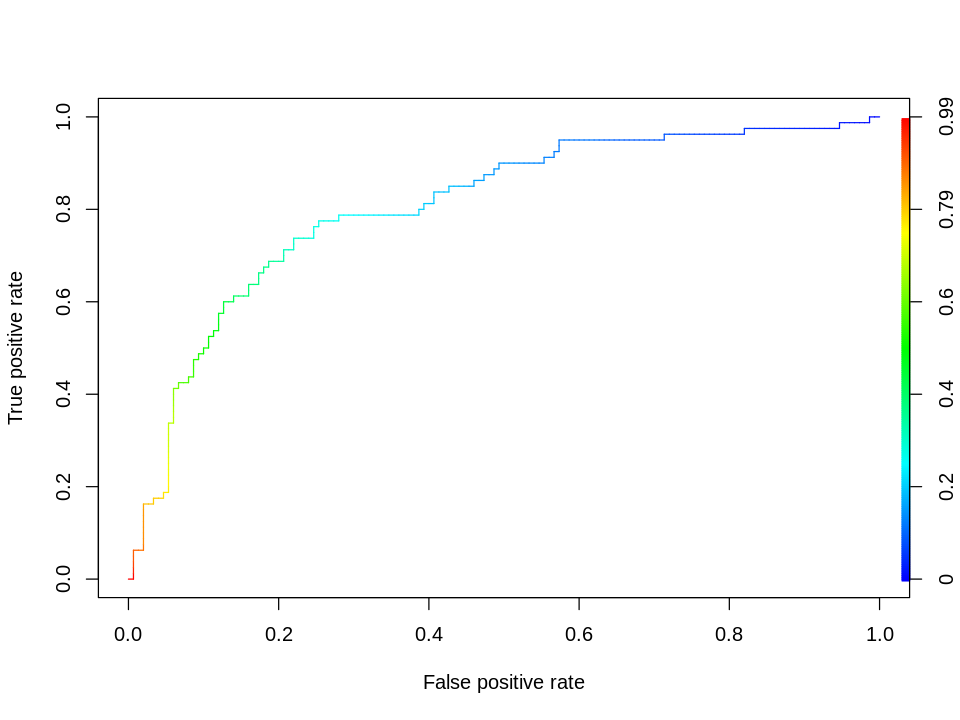

In [61]:
#::GMG::(Sensitivity/1-specificity) ROC Curve and AUC (ROCR)
#::NOTE::The ROCR::prediction function needs the labels as a 0/1 numeric vector
pred_test <- ROCR::prediction(pred_pima_test, ifelse(pima_test$Outcome == 'pos', 1, 0))
perf_test <- ROCR::performance(pred_test, "tpr", "fpr")
ROCR::plot(perf_test, colorize=TRUE)

In [62]:
#::GMG:: Get the ROC AUC
roc_auc_test <- unlist(slot(ROCR::performance(pred_test, "auc"), "y.values"))
cat('Test ROC AUC:', roc_auc_test)

Test ROC AUC: 0.8058333

In [63]:
#::GMG::The RIC AUC of the simpler model for comparison
pred_test_2 <- ROCR::prediction(pred_pima_test_2, ifelse(pima_test$Outcome == 'pos', 1, 0))
roc_auc_test_2 <- unlist(slot(ROCR::performance(pred_test_2, "auc"), "y.values"))
cat('Test ROC AUC (Simpler Model):', roc_auc_test_2)

Test ROC AUC (Simpler Model): 0.8054167

### out-of-sample P/R Curve (and P/R AUC)

In [64]:
#::GMG::P/R Curve and AUC (PRROC)
#::NOTE::Soft-labeled classification problem:
#        Each data point belongs to both of the two classes with a certain probability, where for each data
#        point, these two probabilities add up to 1. In this case, the classification scores for all data points
#        need to be provided only once as scores.class0 and only the positive/foreground weights for each
#        data point need to be provided in weights.class0, while the converse probability for the negative
#        class is automatically set to weights.class1=1.0-weights.class0.
score1_test <- pred_pima_test[pima_test$Outcome == 'pos']
score0_test <- pred_pima_test[pima_test$Outcome == 'neg']
pr_curve_pima_test <- PRROC::pr.curve(
    score1_test, 
    score0_test, 
    min.compute = T, 
    max.compute = T,
    rand.compute = T,
    curve = T
)
print(pr_curve_pima_test)


  Precision-recall curve

    Area under curve (Integral):
     0.6543499 

    Relative area under curve (Integral):
     0.5687231 

    Area under curve (Davis & Goadrich):
     0.6533578 

    Relative area under curves (Davis & Goadrich):
     0.5674874 

    Curve for scores from  0.001418997  to  0.9890509 
    ( can be plotted with plot(x) )



    Maximum AUC:
     1   1 


    Minimum AUC:
     0.1985425   0.1985385 


    AUC of a random classifier:
     0.3478261   0.3478261 


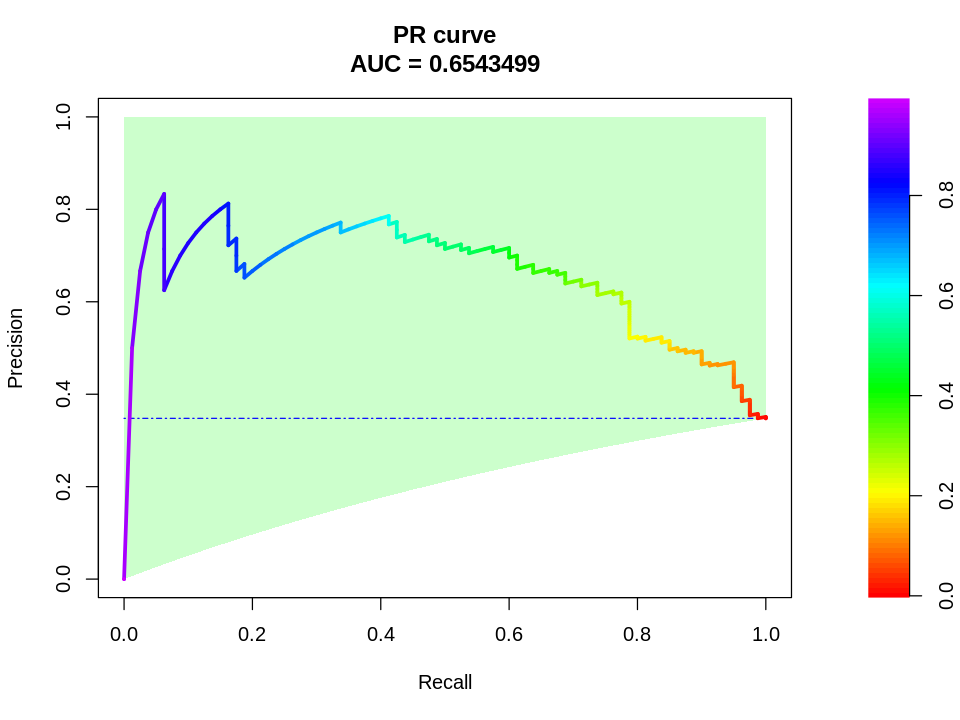

In [65]:
#::GMG::Plot P/R curve with all the trimmings
plot(pr_curve_pima_test, 
     rand.plot = TRUE, 
     fill.area = TRUE, 
     fill.color = rgb(0.8,1,0.8),
     maxminrand.col = "blue" 
)

> If computed, the maximum and minimum curve and the curve of the random classifier may be included into the PR curve (and ROC curve) plots using parameters `max.plot`, `min.plot`, and `rand.plot`, respectively. In addition, the area between maximum and minimum curve may be shaded.

[PRROC: computing and visualizing precision-recall and receiver operating characteristic curves in R](https://cran.r-project.org/web/packages/PRROC/vignettes/PRROC.pdf) pp. 9

> Note that for a random classifier, ROC AUC will be close to 0.5 irrespective of the class imbalance. However, the PR AUC is tricky. (see [What is "baseline" in precision recall curve](https://stats.stackexchange.com/questions/251175/what-is-baseline-in-precision-recall-curve))

[CrossValidated](https://stats.stackexchange.com/questions/10501/calculating-aupr-in-r) Calculating AUPR in R [closed]

In [66]:
pr_auc_test <- pr_curve_pima_test$auc.integral
cat('Test P/R AUC:', pr_auc_test)

Test P/R AUC: 0.6543499

## Binary Classification

In [67]:
#::GMG::Variables created so far :)
#::NOTE::To keep track of results to include in a dataframe later
#        i.e roc_auc_* and pr_auc_* at the moment
ls()

[1] "col"                  "fit_pima"             "fit_pima2"           
 [4] "M"                    "msk"                  "perf_test"           
 [7] "perf_train"           "pima"                 "pima_test"           
[10] "pima_train"           "PimaIndiansDiabetes"  "PimaIndiansDiabetes2"
[13] "pr_auc_test"          "pr_auc_train"         "pr_curve_pima_test"  
[16] "pr_curve_pima_train"  "pred_pima_test"       "pred_pima_test_2"    
[19] "pred_pima_train"      "pred_pima_train_2"    "pred_test"           
[22] "pred_test_2"          "pred_train"           "pred_train_2"        
[25] "roc_auc_test"         "roc_auc_test_2"       "roc_auc_train"       
[28] "roc_auc_train_2"      "score0_test"          "score0_train"        
[31] "score1_test"          "score1_train"         "using"

### confusion matrix and metrics

In [68]:
#::GMG::Confusion Matrix AND metrics
# cm <- table(Predicted = pima_pred, Actual = pima_test$Outcome)
# https://www.rdocumentation.org/packages/base/versions/3.6.1/topics/table
# https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/
# https://stackoverflow.com/questions/33621592/sum-of-antidiagonal-of-a-matrix
# https://stackoverflow.com/questions/14577412/how-to-convert-variable-object-name-into-string
confusion_matrix <- function (true, pred, beta = 1) {
    t <- table(true, pred)
    p <- t[2,2]/sum(t[,2])
    r <- t[2,2]/sum(t[2,])
    s <- t[1,1]/sum(t[1,])
    list(cm = t,
         accuracy = sum(diag(t))/sum(t), 
         #error_rate = sum(diag(t[nrow(t):1,]))/sum(t),
         precision = p, 
         recall = r,        #::NOTE::it's also called sensitivity
         f1 = (1 + beta^2) * p * r/((beta^2 * p) + r),
         specificity = s,
         #prevalence = sum(t[2,])/sum(t),
         balanced_accuracy = (r + s) / 2
        )
}

### default cut-off

**::GMG::** I have to define a **cut-off** or **threshold** probability first.

> [...] a logistic regression model is not a classifier. It is a model for the probability parameter of the binomial distribution. This is why predict() gives probabilities.In order to make it a classifier you need to specify a function converts probabilities into classes. Choosing a cutoff is one way [...]
>
> [...] The predicted values only tell you how likely it is that an observation belongs to the class coded as 1 given its explanatory variables. For classification, you need to find a threshold t which in some sense is optimal for your problem. This is e.g. affected by monetary costs or ethical boundaries.

([StackExchange](https://stats.stackexchange.com/questions/133320/logistic-regression-class-probabilities) Logistic regression: class probabilities, Asked 4 years, 7 months ago)

In [69]:
#::GMG::On the basis of random choice or personal whim, rather than any reason or system ...
#::NOTE::OK, I think: if the prediction is a probability then split at 0.5
p_cut_default <- 0.5

In [70]:
#::GMG::Predicted classes with 0.5 cut-off value
#::NOTE:In-sample
pred_class_train_default <- as.factor(ifelse(test = pred_pima_train > p_cut_default, yes = 2, no = 1))
levels(pred_class_train_default) <- c('neg', 'pos')
cat('Classification In-sample: \n')
str(pred_class_train_default)
#::NOTE::Out-of-sample
pred_class_test_default <- as.factor(ifelse(test = pred_pima_test > p_cut_default, yes = 2, no = 1))
levels(pred_class_test_default) <- c('neg', 'pos')
cat('Classification Out-of-sample: \n')
str(pred_class_test_default)

Classification In-sample: 
 Factor w/ 2 levels "neg","pos": 2 1 2 1 2 1 2 2 1 2 ...
 - attr(*, "names")= chr [1:538] "1" "2" "3" "4" ...
Classification Out-of-sample: 
 Factor w/ 2 levels "neg","pos": 1 1 2 1 1 2 1 1 1 1 ...
 - attr(*, "names")= chr [1:230] "7" "10" "12" "24" ...


In [71]:
#::GMG::I do the same with the 'simpler' model
pred_class_train_default_2 <- as.factor(ifelse(test = pred_pima_train_2 > p_cut_default, yes = 2, no = 1))
levels(pred_class_train_default_2) <- c('neg', 'pos')
cat('Classification In-sample (Simpler model): \n')
str(pred_class_train_default_2)
#::NOTE::Out-of-sample
pred_class_test_default_2 <- as.factor(ifelse(test = pred_pima_test_2 > p_cut_default, yes = 2, no = 1))
levels(pred_class_test_default_2) <- c('neg', 'pos')
cat('Classification Out-of-sample Simpler model): \n')
str(pred_class_test_default_2)

Classification In-sample (Simpler model): 
 Factor w/ 2 levels "neg","pos": 2 1 2 1 2 1 2 2 1 2 ...
 - attr(*, "names")= chr [1:538] "1" "2" "3" "4" ...
Classification Out-of-sample Simpler model): 
 Factor w/ 2 levels "neg","pos": 1 1 2 1 1 2 1 1 1 1 ...
 - attr(*, "names")= chr [1:230] "7" "10" "12" "24" ...


In [72]:
#::GMG::Compute confusion matrix and metrics (in-sample)
cf_train_default <- confusion_matrix(true = pima_train$Outcome, pred = pred_class_train_default)
#::GMG::Print 'raw' confusion matrix
cf_train_default$cm

     pred
true  neg pos
  neg 309  41
  pos  76 112

In [73]:
#::GMG::Compute confusion matrix and metrics (out-of-sample)
cf_test_default <- confusion_matrix(true = pima_test$Outcome, pred = pred_class_test_default)
#::GMG::Print 'raw' confusion matrix
cf_test_default$cm

     pred
true  neg pos
  neg 134  16
  pos  40  40

**::GMG::** Each row in a confusion matrix represents an actual target, while each column represents a predicted target. The first row of this matrix considers the *negative class* (healthy individuals) (the *False class*): **134** were *correctly classified* as healthy individuals (*True negative*), while the remaining **16** were *wrongly classified* as diabetic individuals (*False positive*). The second row considers the *positive class* (diabetic individuals), they were **40** *True positive*, while the *False negatives* were also **40**. 

In [74]:
#::GMG::Remenber the counts of neg and pos within pima_test ...
table(pima_test$Outcome)


neg pos 
150  80 

**::GMG::** Now, in this specific application the last result *may not be acceptable* if I want to detect the diabetic people (*True positives*) among the individuals. If I want to improve this performance I have to *change the cut-off* used to decide the class of an individual within the probability response vector. 

In [75]:
#::GMG::Now for the 'simpler' model
cf_2_train_default <- confusion_matrix(true = pima_train$Outcome, pred = pred_class_train_default_2)
cf_2_train_default$cm

     pred
true  neg pos
  neg 310  40
  pos  77 111

In [76]:
#::GMG::The 'simpler model' is even worse at detecting diabetic people!!
#::NOTE::Again a cut-off issue or what?
cf_2_test_default <- confusion_matrix(true = pima_test$Outcome, pred = pred_class_test_default_2)
cf_2_test_default$cm

     pred
true  neg pos
  neg 135  15
  pos  43  37

In [77]:
#::GMG:I collect the retults so far in a daraframe
#::NOTE::First thought using a 'tibble' discarded ...
# https://cran.r-project.org/web/packages/tibble/vignettes/tibble.html
# tibble::tibble(metric = names(cf[-1]), pima_logit = cf[-1])
# https://www.r-bloggers.com/converting-a-list-to-a-data-frame/
#as.data.frame.list(x = cf[-1], row.names = c('pima_logit'))
#::NOTE::Using a dear plain old R data.frame
# https://stackoverflow.com/questions/32059798/list-of-named-lists-to-data-frame
# https://stackoverflow.com/questions/10432993/named-list-to-from-data-frame
# https://www.rdocumentation.org/packages/base/versions/3.6.1/topics/as.data.frame
# https://www.rdocumentation.org/packages/base/versions/3.6.1/topics/names
#::NOTE::sensitivity (pos class) is recall
results <- as.data.frame(t(sapply(list(cf_train_default[-1], cf_test_default[-1]), rbind)),
                         row.names = c('pima_default_train', 'pima_default_test')
)
colnames(results) <- names(cf_train_default[-1])
#::NOTE::This measures do not depend on cut-off so I leave them off
#results[,'roc_auc'] <- c(roc_auc_train, roc_auc_test)
#results[,'pr_auc'] <- c(pr_auc_train, pr_auc_test)
results[,'p_cut'] <- c(p_cut_default, p_cut_default)
# https://stackoverflow.com/questions/23217520/limiting-the-number-of-decimals-in-a-dataframe-r
print(results, digits = 3)

                   accuracy precision recall    f1 specificity
pima_default_train    0.783     0.732  0.596 0.657       0.883
pima_default_test     0.757     0.714    0.5 0.588       0.893
                   balanced_accuracy p_cut
pima_default_train             0.739   0.5
pima_default_test              0.697   0.5


**::GMG::** Metrics, old way line by line with formatted ouputs

```R
# https://stackoverflow.com/questions/3443687/formatting-decimal-places-in-r
cat(sep='', "Accuracy: ", format(round(cf`$`accuracy, 2), nsmall = 2), 
    ", Balanced Accuracy ", format(round(cf`$`balanced_accuracy, 2), nsmall = 2))

cat(sep = '', "Precision: ", format(round(cf`$`precision, 2), nsmall = 2), 
    ", Recall: ", format(round(cf`$`recall, 2), nsmall = 2),
    ", Fl: ", format(round(cf`$`f1, 2), nsmall = 2)
   )

cat(sep='', "Specificity: ", format(round(cf`$`specificity, 2), nsmall = 2), 
    ", Sensitivity ", format(round(cf`$`recall, 2), nsmall = 2))
```

**::NOTE::** The dollar sign does not display well within a code highlighting section in a Jupyter Markdown cell ...

&#0036;

**::GMG::** It is impossible to have both a high precision and high recall (*Precision vs Recall tradeoff*) If I increase the precision, the correct individual will be better predicted, but I would miss lots of them (lower recall). In some situation, I prefer higher precision than recall. There is a concave relationship between precision and recall. 

### naive cut-off

> The simplest way is to choose the event proportion in training sample. This is roughly reasonable because the sample proportion is an estimate of mean probability of Y=1.

([Lab Notebook](http://homepages.uc.edu/~lis6/Teaching/DM18Spring/Lab/lab5_logit.html) in [Data Mining I (BANA7046) 2018 Spring](http://homepages.uc.edu/~lis6/DM-18Spring.html) by [Shaobo Li](http://homepages.uc.edu/~lis6/))

In [78]:
#::GMG::I choose the naive cut-off
pcut_naive <- mean(pima_train$Outcome == 'pos')
cat('Naive cut-off:', pcut_naive)

Naive cut-off: 0.3494424

In [79]:
#::GMG::Class predicition in-sample
#::NOTE::Cast the predicted classes as a factor
pred_class_train_naive <- as.factor(ifelse(test = pred_pima_train > pcut_naive, yes = 2, no = 1))
levels(pred_class_train_naive) <- c('neg', 'pos')
str(pred_class_train_naive)

 Factor w/ 2 levels "neg","pos": 2 1 2 1 2 1 2 2 1 2 ...
 - attr(*, "names")= chr [1:538] "1" "2" "3" "4" ...


In [80]:
#::GMG::Class predicition out-of-sample
#::NOTE::Cast the predicted classes as a factor
pred_class_test_naive <- as.factor(ifelse(test = pred_pima_test > pcut_naive, yes = 2, no = 1))
levels(pred_class_test_naive) <- c('neg', 'pos')
str(pred_class_test_naive)

 Factor w/ 2 levels "neg","pos": 1 1 2 1 2 2 1 1 1 1 ...
 - attr(*, "names")= chr [1:230] "7" "10" "12" "24" ...


In [81]:
#::GMG::Compute the confusiona matrix and metrics in-sample
cf_train_naive <- confusion_matrix(true = pima_train$Outcome, 
                             pred = pred_class_train_naive)
cf_train_naive$cm

     pred
true  neg pos
  neg 281  69
  pos  51 137

In [82]:
#::GMG::Compute the confusiona matrix and metrics out-of-sample
cf_test_naive <- confusion_matrix(true = pima_test$Outcome, 
                             pred = pred_class_test_naive)
cf_test_naive$cm

     pred
true  neg pos
  neg 122  28
  pos  25  55

In [83]:
#::GMG::Add it to the previous results with the naive cut-off
results['pima_naive_train',] <- cf_train_naive[-1]
results['pima_naive_test',] <- cf_test_naive[-1]
results[c('pima_naive_train','pima_naive_test'),'p_cut'] <- c(pcut_naive, pcut_naive)
print(results, digits = 3)

                   accuracy precision recall    f1 specificity
pima_default_train    0.783     0.732  0.596 0.657       0.883
pima_default_test     0.757     0.714    0.5 0.588       0.893
pima_naive_train      0.777     0.665  0.729 0.695       0.803
pima_naive_test        0.77     0.663  0.688 0.675       0.813
                   balanced_accuracy p_cut
pima_default_train             0.739 0.500
pima_default_test              0.697 0.500
pima_naive_train               0.766 0.349
pima_naive_test                 0.75 0.349


### cut-off with (p)ROC 

> [...] The predicted values only tell you how likely it is that an observation belongs to the class coded as 1 given its explanatory variables. For classification, you need to find a threshold t which in some sense is optimal for your problem. This is e.g. affected by monetary costs or ethical boundaries.
>
>If you don't have any of these costs or boundaries, i.e. a cost function, one criterion could be to minimize the sum of the error frequencies. For this the following two terms are important:
>
>  - Sensitivity denotes the fraction of positives that were correctly specified for a given t.
>  - Specificity denotes the fraction of negatives that were correctly specified for a given t.
>
>Denote s0 as Senstitvity and s1 as Specificty, minimizing the sum of the error frequencies is equivalent to finding maximum $s_0(t)+s_1(t)$ for all thresholds t.

([StackExchange](https://stats.stackexchange.com/questions/133320/logistic-regression-class-probabilities) Logistic regression: class probabilities, Asked 4 years, 7 months ago)

**::GMG::** OK, there is no function cost here. I guess I can say the cost of finding diabetic people is not overwhelming (by the features I know some med tests and measures must be done ...) so I go for the minimization of error frequencies using [`Sensitivity` and `Specificity`](https://en.wikipedia.org/wiki/Sensitivity_and_specificity)

**::NOTE::** Yet another library, i.e. `pROC` ... perhaps I should keep the number of libraries tight, eh? :)

In [89]:
#::GMG::Select the optimum cut-off with pROC roc() function
# https://cran.r-project.org/web/packages/pROC/pROC.pdf pp. 72
# https://stats.stackexchange.com/questions/133320/logistic-regression-class-probabilities
#::NOTE::apply roc function
#        Here, response is my vector of ones and zeros and predictor my predictions. 
analysis <- pROC::roc(response = pima_train$Outcome, 
                      predictor = pred_pima_train)

Setting levels: control = neg, case = pos
Setting direction: controls < cases


In [90]:
str(analysis)

List of 15
 $ percent           : logi FALSE
 $ sensitivities     : num [1:539] 1 1 1 1 1 ...
 $ specificities     : num [1:539] 0 0.00286 0.00571 0.00857 0.01143 ...
 $ thresholds        : num [1:539] -Inf 0.00173 0.00304 0.00436 0.00589 ...
 $ direction         : chr "<"
 $ cases             : Named num [1:188] 0.643 0.793 0.934 0.795 0.846 ...
  ..- attr(*, "names")= chr [1:188] "1" "3" "5" "9" ...
 $ controls          : Named num [1:350] 0.0344 0.0367 0.131 0.5809 0.2189 ...
  ..- attr(*, "names")= chr [1:350] "2" "4" "6" "8" ...
 $ fun.sesp          :function (thresholds, controls, cases, direction)  
 $ auc               : 'auc' num 0.853
  ..- attr(*, "partial.auc")= logi FALSE
  ..- attr(*, "percent")= logi FALSE
  ..- attr(*, "roc")=List of 15
  .. ..$ percent           : logi FALSE
  .. ..$ sensitivities     : num [1:539] 1 1 1 1 1 ...
  .. ..$ specificities     : num [1:539] 0 0.00286 0.00571 0.00857 0.01143 ...
  .. ..$ thresholds        : num [1:539] -Inf 0.00173 0.00304 0

In [91]:
#::GMG::Find pcut that minimizes error
e <- cbind(analysis$thresholds,
           analysis$sensitivities + analysis$specificities)
pcut_proc <- subset(e,e[,2] == max(e[,2]))[,1]
cat('Cut-off chosen with max (sensitivity + specificity) for positive class:', pcut_proc)

Cut-off chosen with max (sensitivity + specificity) for positive class: 0.3193935

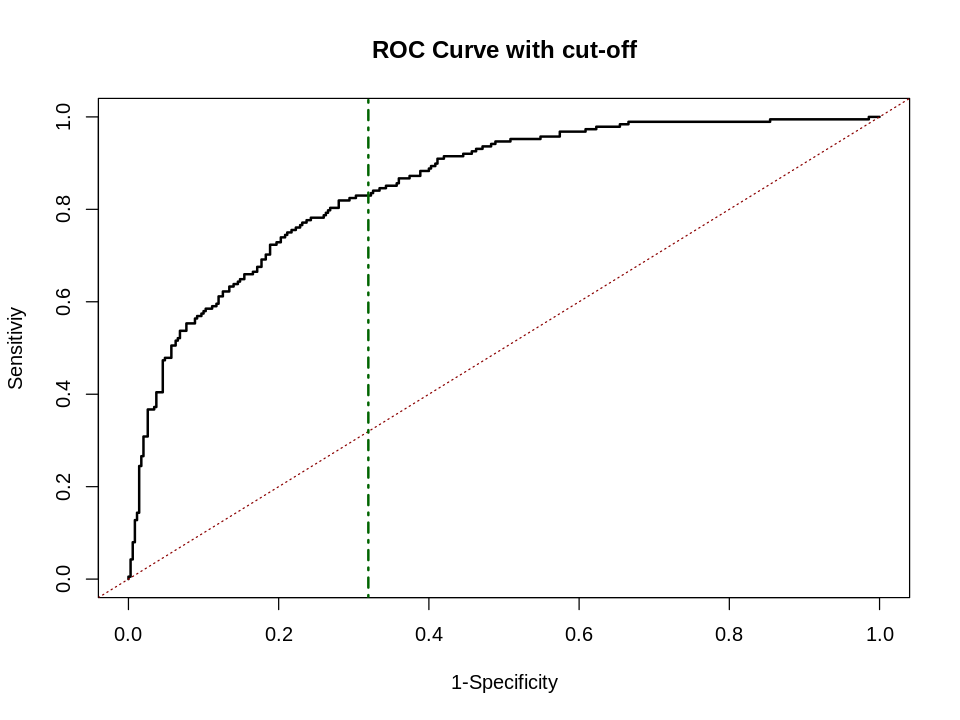

In [93]:
#::GMG::Plot ROC Curve
#::NOTE::Moreover, the code produces also the corresponding ROC curve and adds a vertical line where the optimal 
#        threshold was found.
plot(1-analysis$specificities,
     analysis$sensitivities,type="l",
     ylab="Sensitiviy",
     xlab="1-Specificity",
     col="black",
     lwd=2,
     main = "ROC Curve with cut-off")
abline(a=0, b=1, col = 'darkred', lty = 3)
abline(v = pcut_proc, col = 'darkgreen', lty = 4, lwd = 2) #::NOTE::add optimal t to ROC curve

In [94]:
#::GMG::I can also get all the data I need with pROC::coords
#::NOTE::This function returns the coordinates of the ROC curve at the specified point.
# https://cran.r-project.org/web/packages/pROC/pROC.pdf pp 34-38
#::NOTE::[...]the best.method argument controls how the optimal threshold is determined.
#       “youden” Youden’s J statistic (Youden, 1950) is employed. The optimal cut-off is the threshold
#       that maximizes the distance to the identity (diagonal) line. Can be shortened to “y”.
#       The optimality criterion is:
#       max(sensitivities + specif icities)
pROC::coords(analysis, 
             "best", 
             best.method = "youden", 
             transpose = TRUE)

threshold specificity sensitivity 
  0.3193935   0.7685714   0.7712766

In [96]:
#::GMG::Class predicition in-sample
pred_class_train_proc <- as.factor(ifelse(test = pred_pima_train > pcut_proc, yes = 2, no = 1))
levels(pred_class_train_proc) <- c('neg', 'pos')
str(pred_class_train_proc)

 Factor w/ 2 levels "neg","pos": 2 1 2 1 2 1 2 2 1 2 ...
 - attr(*, "names")= chr [1:538] "1" "2" "3" "4" ...


In [97]:
#::GMG::Class predicition out-of-sample
#::NOTE::Cast the predicted classes as a factor
pred_class_test_proc <- as.factor(ifelse(test = pred_pima_test > pcut_proc, yes = 2, no = 1))
levels(pred_class_test_proc) <- c('neg', 'pos')
str(pred_class_test_proc)

 Factor w/ 2 levels "neg","pos": 1 1 2 1 2 2 1 1 1 1 ...
 - attr(*, "names")= chr [1:230] "7" "10" "12" "24" ...


In [98]:
#::GMG::Compute the confusion matrix and metrics in-sample
cf_train_proc <- confusion_matrix(true = pima_train$Outcome, 
                             pred = pred_class_train_proc)
cf_train_proc$cm

     pred
true  neg pos
  neg 269  81
  pos  43 145

In [99]:
#::GMG::Compute the confusion matrix and metrics out-of-sample
cf_test_proc <- confusion_matrix(true = pima_test$Outcome, 
                             pred = pred_class_test_proc)
cf_test_proc$cm

     pred
true  neg pos
  neg 119  31
  pos  24  56

In [100]:
#::GMG::Add it to the previous results with the pROC cut-off
results['pima_proc_train',] <- cf_train_proc[-1]
results['pima_proc_test',] <- cf_test_proc[-1]
results[c('pima_proc_train','pima_proc_test'),'p_cut'] <- c(pcut_proc, pcut_proc)
print(results, digits = 3)

                   accuracy precision recall    f1 specificity
pima_default_train    0.783     0.732  0.596 0.657       0.883
pima_default_test     0.757     0.714    0.5 0.588       0.893
pima_naive_train      0.777     0.665  0.729 0.695       0.803
pima_naive_test        0.77     0.663  0.688 0.675       0.813
pima_proc_train        0.77     0.642  0.771   0.7       0.769
pima_proc_test        0.761     0.644    0.7 0.671       0.793
                   balanced_accuracy p_cut
pima_default_train             0.739 0.500
pima_default_test              0.697 0.500
pima_naive_train               0.766 0.349
pima_naive_test                 0.75 0.349
pima_proc_train                 0.77 0.319
pima_proc_test                 0.747 0.319


### cut-off with ROCR

> In some applications of ROC curves, you want the point closest to the TPR of \(1\) and FPR of \(0\). This cut point is “optimal” in the sense it weighs both sensitivity and specificity equally. To deterimine this cutoff, you can use the code below. The code takes in BOTH the performance object and prediction object and gives the optimal cutoff value of your predictions.

([Hopstat Blog](https://hopstat.wordpress.com/2014/12/19/a-small-introduction-to-the-rocr-package/) A small introduction to the ROCR package. Posted on December 19, 2014 by strictlystat)

In [101]:
#::GMG::Yet another method with ROCR
# https://hopstat.wordpress.com/2014/12/19/a-small-introduction-to-the-rocr-package/
opt.cut <- function(perf, pred, model = 'model'){
    cut.ind = mapply(FUN=function(x, y, p){
        d = (x - 0)^2 + (y-1)^2
        ind = which(d == min(d))
        c(sensitivity = y[[ind]], specificity = 1-x[[ind]], 
            cutoff = p[[ind]])
    }, perf@x.values, perf@y.values, pred@cutoffs)
    #::NOTE::better a dataframe returned?
    as.data.frame.matrix(cut.ind)
    colnames(cut.ind) = model
    return (cut.ind)
}

In [102]:
#::GMG::So I don't need pROC anymore! :)
print(opt.cut(perf_train, pred_train), digits = 3)

            model
sensitivity 0.771
specificity 0.769
cutoff      0.320


> Now, there is a cost measure in the ROCR package that you can use to create a performance object. If you use it to find the minimum cost, then it will give you the same cutoff as opt.cut, but not give you the sensitivity and specificity.

([Hopstat Blog](https://hopstat.wordpress.com/2014/12/19/a-small-introduction-to-the-rocr-package/) A small introduction to the ROCR package. Posted on December 19, 2014 by strictlystat)

In [105]:
#::GMG::It doesn't give me the SAME cut-off at all ... Why?
# https://cran.r-project.org/web/packages/ROCR/ROCR.pdf pp. 2-5
#::NOTE::cost: Cost of a classifier when class-conditional misclassification costs are explicitly given. 
#        Accepts the optional parameters cost.fp and cost.fn, by which the costs for false positives and
#        negatives can be adjusted, respectively. By default, both are set to 1.
#::NOTE::See also the description of the perfomance class (the value returned by the function)
#        performance-class Class "performance" pp. 5-6
#
cost.perf <- ROCR::performance(pred_train, "cost")
pred_train@cutoffs[[1]][which.min(cost.perf@y.values[[1]])]

284 
0.6114231

> The output from opt.cut and a performance object with measure cost are NOT equivalent if false positives and false negatives are not weighted equally. The cost.fn and cost.fp arguments can be passed to performance, corresponding to the cost of a false negative and false positive, respectively. Let's say false positives are twice as costly as false negatives, and let's get a cut point.
> [...] No cost analysis is this simple and is usually based on many factors, but most analyses do not have equal cost for a false positive versus a false negative.

([Hopstat Blog](https://hopstat.wordpress.com/2014/12/19/a-small-introduction-to-the-rocr-package/) A small introduction to the ROCR package. Posted on December 19, 2014 by strictlystat)

**::GMG::** In my case the *false positives* are the healthy individuals that are classified as diabetics and the *false negatives* are diabetic individuals that are classified as healthy.

In [106]:
cost.perf <- performance(pred_train, "cost", cost.fp = 2, cost.fn = 1)
pred_train@cutoffs[[1]][which.min(cost.perf@y.values[[1]])]

416 
0.6780035

**::NOTE::** There are more examples in [Hopstat Blog](https://hopstat.wordpress.com/2014/12/19/a-small-introduction-to-the-rocr-package/) for gettimg the cutoff with cost functions related to metrics like `accuracy` and (ROC) `AUC`. Those metrics are not very useful in my case because my dataset is umbalanced.

In [109]:
pcut_2fp_fn <- as.numeric(pred_train@cutoffs[[1]][which.min(cost.perf@y.values[[1]])])

In [110]:
#::GMG::Class predicition in-sample
pred_class_train_2fp_fn <- as.factor(ifelse(test = pred_pima_train > pcut_2fp_fn, yes = 2, no = 1))
levels(pred_class_train_2fp_fn) <- c('neg', 'pos')
str(pred_class_train_2fp_fn)

 Factor w/ 2 levels "neg","pos": 1 1 2 1 2 1 1 2 1 2 ...
 - attr(*, "names")= chr [1:538] "1" "2" "3" "4" ...


In [111]:
#::GMG::Class predicition out-of-sample
#::NOTE::Cast the predicted classes as a factor
pred_class_test_2fp_fn <- as.factor(ifelse(test = pred_pima_test > pcut_2fp_fn, yes = 2, no = 1))
levels(pred_class_test_2fp_fn) <- c('neg', 'pos')
str(pred_class_test_2fp_fn)

 Factor w/ 2 levels "neg","pos": 1 1 2 1 1 2 1 1 1 1 ...
 - attr(*, "names")= chr [1:230] "7" "10" "12" "24" ...


In [112]:
#::GMG::Compute the confusion matrix and metrics in-sample
cf_train_2fp_fn <- confusion_matrix(true = pima_train$Outcome, 
                             pred = pred_class_train_2fp_fn)
cf_train_2fp_fn$cm

     pred
true  neg pos
  neg 334  16
  pos 100  88

In [113]:
#::GMG::Compute the confusion matrix and metrics out-of-sample
cf_test_2fp_fn <- confusion_matrix(true = pima_test$Outcome, 
                             pred = pred_class_test_2fp_fn)
cf_test_2fp_fn$cm

     pred
true  neg pos
  neg 142   8
  pos  54  26

In [114]:
#::GMG::Add it to the previous results with the pROC cut-off
results['pima_2fp_fn_train',] <- cf_train_2fp_fn[-1]
results['pima_2fp_fn_test',] <- cf_test_2fp_fn[-1]
results[c('pima_2fp_fn_train','pima_2fp_fn_test'),'p_cut'] <- c(pcut_2fp_fn, pcut_2fp_fn)
print(results, digits = 3)

                   accuracy precision recall    f1 specificity
pima_default_train    0.783     0.732  0.596 0.657       0.883
pima_default_test     0.757     0.714    0.5 0.588       0.893
pima_naive_train      0.777     0.665  0.729 0.695       0.803
pima_naive_test        0.77     0.663  0.688 0.675       0.813
pima_proc_train        0.77     0.642  0.771   0.7       0.769
pima_proc_test        0.761     0.644    0.7 0.671       0.793
pima_2fp_fn_train     0.784     0.846  0.468 0.603       0.954
pima_2fp_fn_test       0.73     0.765  0.325 0.456       0.947
                   balanced_accuracy p_cut
pima_default_train             0.739 0.500
pima_default_test              0.697 0.500
pima_naive_train               0.766 0.349
pima_naive_test                 0.75 0.349
pima_proc_train                 0.77 0.319
pima_proc_test                 0.747 0.319
pima_2fp_fn_train              0.711 0.678
pima_2fp_fn_test               0.636 0.678


**::PENDING::** <span style="color:red">Cut-off with `precision/recall/f1/balanced accuracy`?</span>

**::NOTE::** See `ROCR::performance()` *Details* in [vignette](https://cran.r-project.org/web/packages/ROCR/ROCR.pdf) pp. 2-3

### cut-off using (custom) Grid Search Method

**::GMG::** I follow the [Shaobo Li](http://homepages.uc.edu/~lis6/)'s recipe in his [Lab Notebook](http://homepages.uc.edu/~lis6/Teaching/DM18Spring/Lab/lab5_logit.html):

> You need to search all possible p-cut to find the one that provides minimum cost. 
> - The first step is to define a *symmetric/asymmetric cost function* `cost_func` (p.e misclassification rate), as a function of cut-off. 
> - Next, define a sequence of probability `p_seq` (you need to search the optimal `p-cut` from this sequence)
> - Then, you need to calculate *the cost* (as you defined before) for each probability in the sequence `p_seq`.
> - Last, draw a plot with cost against `p_seq`, and find the `p-cut` that gives you the minimum cost.

In [115]:
#::GMG::I define a cost function
cost_func <- function(pcut,
                     observations, 
                     predicted_probability,  
                     weight_fn = 1, # define the weight for "true=1 but pred=0" (FN)
                     weight_fp = 1  # define the weight for "true=0 but pred=1" (FP)
){
    c_fn = (observations == 1) & (predicted_probability < pcut)    # count for "true=1 but pred=0"   (FN)
    c_fp = (observations == 0) & (predicted_probability >= pcut)   # count for "true=0 but pred=1"   (FP)
    cost = mean(weight_fn * c_fn + weight_fp * c_fp)  # misclassification with weight
    return (cost)
}

In [116]:
#::GMG::I define a sequence from 0.01 to 1 by 0.01
p_seq = seq(0.01, 1, 0.01) 

In [117]:
#::GMG::GridSearch the pcuts ...
#::NOTE::I'd like to use an apply family function for doing this rather than a classical loop
# https://nicercode.github.io/guides/repeating-things/
# https://www.datacamp.com/community/tutorials/r-tutorial-apply-family
#cost <- rep(0, length(p_seq))
#for(i in 1:length(p_seq)){ 
#    cost[i] <- cost_func(pcut = p_seq[i], 
#                         observations = ifelse(pima_train$Outcome == 'pos', 1, 0), 
#                         predicted_probability = pred_pima_train
#                        )  
#}
cost <- base::sapply(X = p_seq, 
                     FUN = cost_func, 
                     observations = ifelse(pima_train$Outcome == 'pos', 1, 0),
                     predicted_probability = pred_pima_train
)

In [122]:
#::GMG::find the optimal pcut and minimum cost
pcut_cost <- p_seq[which(cost == min(cost))]
cost_min <- cost_func(observations = ifelse(pima_train$Outcome == 'pos', 1, 0), 
                        predicted_probability = pred_pima_train, 
                        pcut = pcut_cost
                      )
cat(sep = '', 'Optimum pcut (cost_min = ', cost_min,'): ', pcut_cost)

Optimum pcut (cost_min = 0.2063197): 0.59

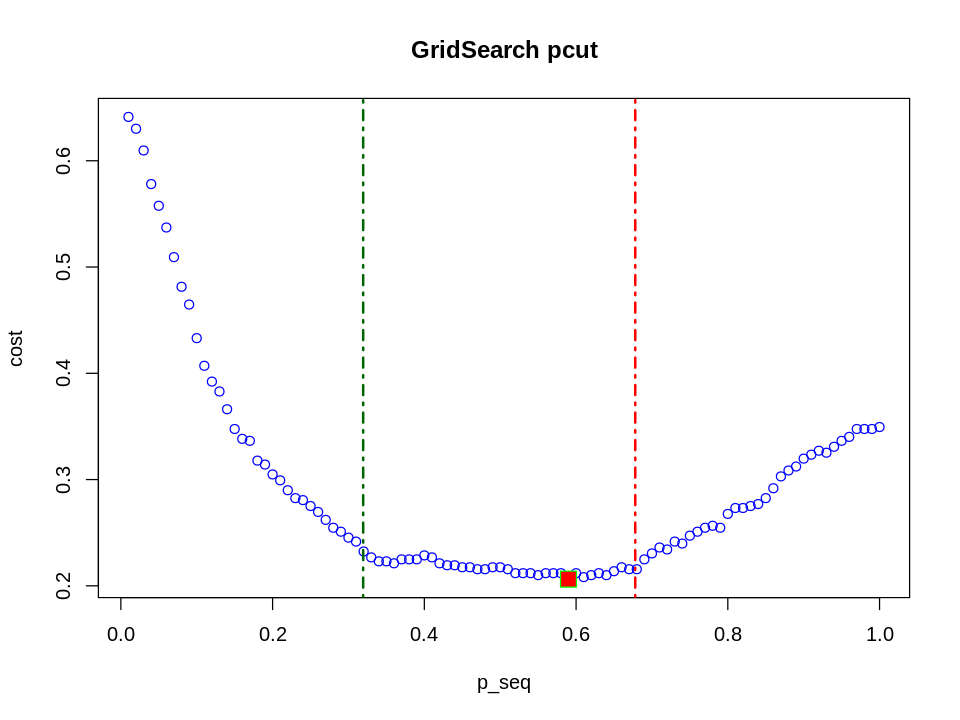

In [138]:
#::GMG::draw a plot with X axis being all pcut and Y axis being associated cost
# http://www.sthda.com/english/wiki/r-plot-pch-symbols-the-different-point-shapes-available-in-r
# https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/points.html
plot(x = p_seq, y = cost, type = 'p', col = 'blue', main = 'GridSearch pcut')
points(x = pcut_cost, y = cost_min, type = 'p', pch = 22, col = 'green', bg = 'red', cex = 2)
abline(v = pcut_proc, col = 'darkgreen', lty = 4, lwd = 2)
abline(v = pcut_2fp_fn, col = 'red', lty = 4, lwd = 2)

In [128]:
#::GMG::Class predicition in-sample
pred_class_train_custom <- as.factor(ifelse(test = pred_pima_train > pcut_cost, yes = 2, no = 1))
levels(pred_class_train_custom) <- c('neg', 'pos')
str(pred_class_train_custom)

 Factor w/ 2 levels "neg","pos": 2 1 2 1 2 1 1 2 1 2 ...
 - attr(*, "names")= chr [1:538] "1" "2" "3" "4" ...


In [130]:
#::GMG::Class predicition out-of-sample
#::NOTE::Cast the predicted classes as a factor
pred_class_test_custom <- as.factor(ifelse(test = pred_pima_test > pcut_cost, yes = 2, no = 1))
levels(pred_class_test_custom) <- c('neg', 'pos')
str(pred_class_test_custom)

 Factor w/ 2 levels "neg","pos": 1 1 2 1 1 2 1 1 1 1 ...
 - attr(*, "names")= chr [1:230] "7" "10" "12" "24" ...


In [131]:
#::GMG::Compute the confusion matrix and metrics in-sample
cf_train_custom <- confusion_matrix(true = pima_train$Outcome, 
                             pred = pred_class_train_custom)
cf_train_custom$cm

     pred
true  neg pos
  neg 323  27
  pos  84 104

In [132]:
#::GMG::Compute the confusion matrix and metrics out-of-sample
cf_test_custom <- confusion_matrix(true = pima_test$Outcome, 
                             pred = pred_class_test_custom)
cf_test_custom$cm

     pred
true  neg pos
  neg 140  10
  pos  47  33

In [133]:
#::GMG::Add it to the previous results with the pROC cut-off
results['pima_custom_train',] <- cf_train_custom[-1]
results['pima_custom_test',] <- cf_test_custom[-1]
results[c('pima_custom_train','pima_custom_test'),'p_cut'] <- c(pcut_cost, pcut_cost)
print(results, digits = 3)

                   accuracy precision recall    f1 specificity
pima_default_train    0.783     0.732  0.596 0.657       0.883
pima_default_test     0.757     0.714    0.5 0.588       0.893
pima_naive_train      0.777     0.665  0.729 0.695       0.803
pima_naive_test        0.77     0.663  0.688 0.675       0.813
pima_proc_train        0.77     0.642  0.771   0.7       0.769
pima_proc_test        0.761     0.644    0.7 0.671       0.793
pima_2fp_fn_train     0.784     0.846  0.468 0.603       0.954
pima_2fp_fn_test       0.73     0.765  0.325 0.456       0.947
pima_custom_train     0.794     0.794  0.553 0.652       0.923
pima_custom_test      0.752     0.767  0.412 0.537       0.933
                   balanced_accuracy p_cut
pima_default_train             0.739 0.500
pima_default_test              0.697 0.500
pima_naive_train               0.766 0.349
pima_naive_test                 0.75 0.349
pima_proc_train                 0.77 0.319
pima_proc_test                 0.747 0.319
pima_2

### cut-off using F1 metric

**::GMG::** My first version: 

```R
#::GMG::I define the new cost function
cost_func_f1 <- function(pcut, obs, pred, beta = 1)
{
    pred_class <- as.factor(ifelse(test = pred > pcut, yes = 2, no = 1))
    levels(pred_class) <- c('neg', 'pos')
    cf <- confusion_matrix(true = obs, pred = pred_class, beta = beta)
    return (cf$f1)
}

#::GMG::I compute the new cost
#::NOTE::beta = 1 means I weigh equal precision and recall
cost_f1 <- base::sapply(
    X = p_seq, 
    FUN = cost_func_f1, 
    obs = pima_train$Outcome,
    pred = pred_pima_train
)

#::GMG::find the optimum pcut and max f1
#::NOTE::F1 may yield NaN when pcut = 1 (fix na.rm = T)
pcut_f1 <- p_seq[which(cost_f1 == max(x = cost_f1, na.rm = T))]
cost_max_f1 <- cost_func_f1(
                        pcut = pcut_f1,
                        obs = pima_train$Outcome, 
                        pred = pred_pima_train
                      )
cat(sep = '', 'Optimum pcut for F1 (max F1 = ', cost_max_f1,'): ', pcut_f1)
```

**::NOTE::** I notice that returning just f1 makes me do the task twice because then I have to compute the confusion matrix and all the mterics again for the optimum `pcut`. As a matter of fact I've already computed them *inside* the cost function but they're lost.

In [171]:
#::GMG::I define the new cost function
#::NOTE::This time I return the whole named list with the confusion matrix and metrics
cost_func_cf <- function(pcut, obs, pred, beta = 1)
{
    pred_class <- as.factor(ifelse(test = pred > pcut, yes = 2, no = 1))
    levels(pred_class) <- c('neg', 'pos')
    cf <- confusion_matrix(true = obs, pred = pred_class, beta = beta)
    return (cf)
}

In [172]:
#::GMG::I compute the new cost
#::NOTE::default beta = 1 means I weigh equal precision and recall, should I have to choose a different beta here?
#        how important is precision over recall in diabetes detection?
#::NOTE::now sapply() returns a matrix of named list colmuns, one per pcut tried with its confusion matrix and
#        metrics as rows ...
cost_cf <- base::sapply(
    X = p_seq, 
    FUN = cost_func_cf, 
    obs = pima_train$Outcome,
    pred = pred_pima_train
)

In [193]:
#::GMG::find the optimum pcut and max f1
#::NOTE::F1 may yield NaN when pcut = 1 (fix: na.rm = T)
#::NOTE::Note that I have to cast the list of f1 values to a numeric vector to be able to find the maximum
pcut_cf_f1 <- p_seq[
    which(
        as.numeric(cost_cf['f1',]) == max(x = as.numeric(cost_cf['f1',]), na.rm = T)
    )
]

In [197]:
#::GMG::Here I get the maximum f1 AND its confusion matrix AND all the rest of the metiics!
max_cf  <- cost_func_cf(
                        pcut = pcut_cf_f1,
                        obs = pima_train$Outcome, 
                        pred = pred_pima_train
                      )

In [198]:
cat(sep = '', 'Optimum pcut for F1 (max F1 = ', max_cf$f1,'): ', pcut_cf_f1)

Optimum pcut for F1 (max F1 = 0.6984925): 0.34

In [199]:
#::GMG::I've already got the confusion matrix and metrics in-sample
max_cf$cm

     pred
true  neg pos
  neg 279  71
  pos  49 139

In [200]:
#::GMG::Class predicition out-of-sample
#::NOTE::Cast the predicted classes as a factor
pred_class_test_f1 <- as.factor(ifelse(test = pred_pima_test > pcut_f1, yes = 2, no = 1))
levels(pred_class_test_f1) <- c('neg', 'pos')
str(pred_class_test_f1)

 Factor w/ 2 levels "neg","pos": 1 1 2 1 2 2 1 1 1 1 ...
 - attr(*, "names")= chr [1:230] "7" "10" "12" "24" ...


In [201]:
#::GMG::Compute the confusion matrix and metrics out-of-sample
cf_test_f1 <- confusion_matrix(true = pima_test$Outcome, 
                             pred = pred_class_test_f1)
cf_test_f1$cm

     pred
true  neg pos
  neg 120  30
  pos  25  55

In [202]:
#::GMG::Add it to the previous results with the pROC cut-off
results['pima_f1_train',] <- max_cf[-1]
results['pima_f1_test',] <- cf_test_f1[-1]
results[c('pima_f1_train','pima_f1_test'),'p_cut'] <- c(pcut_f1, pcut_f1)
print(results, digits = 3)

                   accuracy precision recall    f1 specificity
pima_default_train    0.783     0.732  0.596 0.657       0.883
pima_default_test     0.757     0.714    0.5 0.588       0.893
pima_naive_train      0.777     0.665  0.729 0.695       0.803
pima_naive_test        0.77     0.663  0.688 0.675       0.813
pima_proc_train        0.77     0.642  0.771   0.7       0.769
pima_proc_test        0.761     0.644    0.7 0.671       0.793
pima_2fp_fn_train     0.784     0.846  0.468 0.603       0.954
pima_2fp_fn_test       0.73     0.765  0.325 0.456       0.947
pima_custom_train     0.794     0.794  0.553 0.652       0.923
pima_custom_test      0.752     0.767  0.412 0.537       0.933
pima_f1_train         0.777     0.662  0.739 0.698       0.797
pima_f1_test          0.761     0.647  0.688 0.667         0.8
                   balanced_accuracy p_cut
pima_default_train             0.739 0.500
pima_default_test              0.697 0.500
pima_naive_train               0.766 0.349
pima_naiv

**::PENDING::** <span style="color:red">Discussion (results) here</span>

## Note: Cross-validated Logistic Regression Cost

In [140]:
#::GMG::Let's make it reproducible
set.seed(2)

In [141]:
#::GMG::Get the model to use for CV
# https://www.rdocumentation.org/packages/boot/versions/1.3-20/topics/cv.glm
# http://homepages.uc.edu/~lis6/Teaching/DM18Spring/Lab/lab5_logit.html#cross-validation
#::NOTE::Shaobo Li suggest in his Lab notebook I should use the full data for cross-validation BUT
#        I think I can use the model trained with the training set and use the test set to assess
#        the obtained model as a final validation step (Am I overdoing it a bit maybe?)
#fit_pima_cv <- stats::glm(
#    Outcome ~., 
#    data = pima, 
#    family = binomial(link = 'logit'))
fit_pima_cv <- fit_pima

In [142]:
#::GMG::10-fold cross validation
#::NOTE::I can use the same cost function as defined before, but I need to modify it such that there are only 
#        two input: observed Y and predicted probability so I embed the function into a new one as an anonymous
#        function
# https://www.datacamp.com/community/tutorials/functions-in-r-a-tutorial#anonymous
#::NOTE::I use the pcut computed using the GridSearch approach (pcut_cost)
cv_result <- boot::cv.glm(data = pima_train, 
                          glmfit = fit_pima_cv, 
                          cost = (function (obs, pred_p) cost_func(observations = obs, 
                                                                   predicted_probability = pred_p, 
                                                                   pcut = pcut_cost
                                                                  )
                                  ), 
                          K = 10) 

In [143]:
str(cv_result)

List of 4
 $ call : language boot::cv.glm(data = pima_train, glmfit = fit_pima_cv, cost = (function(obs,      pred_p) cost_func(observations =| __truncated__ ...
 $ K    : num 10
 $ delta: num [1:2] 0.221 0.218
 $ seed : int [1:626] 10403 624 -1619336578 -714750745 -765106180 158863565 -1093870294 242367651 -1691232888 -1538791959 ...


In [146]:
#::GMG::delta
#       A vector of length two. The first component is the raw cross-validation estimate of prediction error. 
#       The second component is the adjusted cross-validation estimate. The adjustment is designed to compensate 
#       for the bias introduced by not using leave-one-out cross-validation.
# https://www.rdocumentation.org/packages/boot/versions/1.3-20/topics/cv.glm
cat('Adjusted (bias corrected) cost:', cv_result$delta[2])

Adjusted (bias corrected) cost: 0.2182115

**::PENDING::** <span style="color:red">cross-validated F1-score?</span>

**::PENDING::** <span style="color:red">cut-off with cross-validation?</span>